In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MeanShift, AgglomerativeClustering, SpectralClustering, OPTICS, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [ ]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/nimoru7/schulich_data_science/refs/heads/main/Customer_Data.csv')

# **1. Data Preprocessing**

# Data Exploration and Cleaning

In [ ]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
df.shape

(8950, 18)

In [ ]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Check for nulls
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# CREDIT_LIMIT has one null so we will just drop it
df = df.dropna(subset=['CREDIT_LIMIT'])

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Look into MINIMUM_PAYMENTS column to see which imputation method would be best

In [ ]:
print(df['MINIMUM_PAYMENTS'].describe())


count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64


In [ ]:
# Check the skewness
print("Skewness:", df['MINIMUM_PAYMENTS'].skew())

Skewness: 13.622193089492017


In [ ]:
# Visualize distribution

Text(0.5, 1.0, 'MINIMUM_PAYMENTS Boxplot')

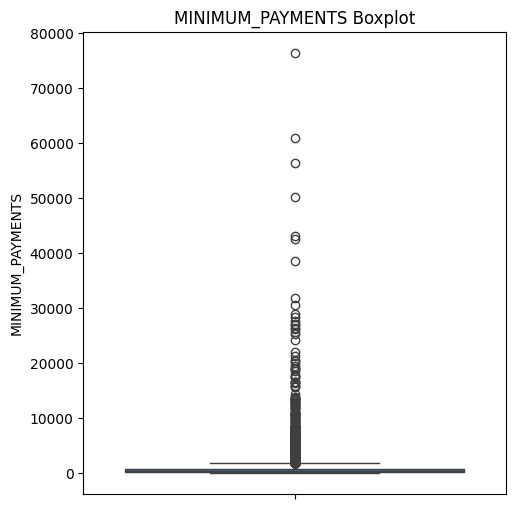

In [ ]:
plt.figure(figsize=(12, 6))

# Boxplot for MINIMUM_PAYMENTS
plt.subplot(1, 2, 1)
sns.boxplot(y=df['MINIMUM_PAYMENTS'])
plt.title('MINIMUM_PAYMENTS Boxplot')

Given there are extreme outliers and that it has high skewness, we will impute using median.

In [ ]:
# Fill missing values in 'MINIMUM_PAYMENTS' with the median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

<ipython-input-16-4695b74fca84>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Check for duplicates
df.duplicated ().sum ()

0

In [ ]:
df.nunique()

CUST_ID                             8949
BALANCE                             8870
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4322
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8710
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [ ]:
# Since CUST_ID is categorical and used to identify rows, we will convert it to an index
df.set_index('CUST_ID', inplace=True)

In [ ]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   6442.945483             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003         7500.0   622.066742        627.284787          0.000000      12  
C10004         7500.0     0.000000        312.452292          0.000000      12  
C10005         1200.0   678.334763        244.791237          0.000000      12

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()

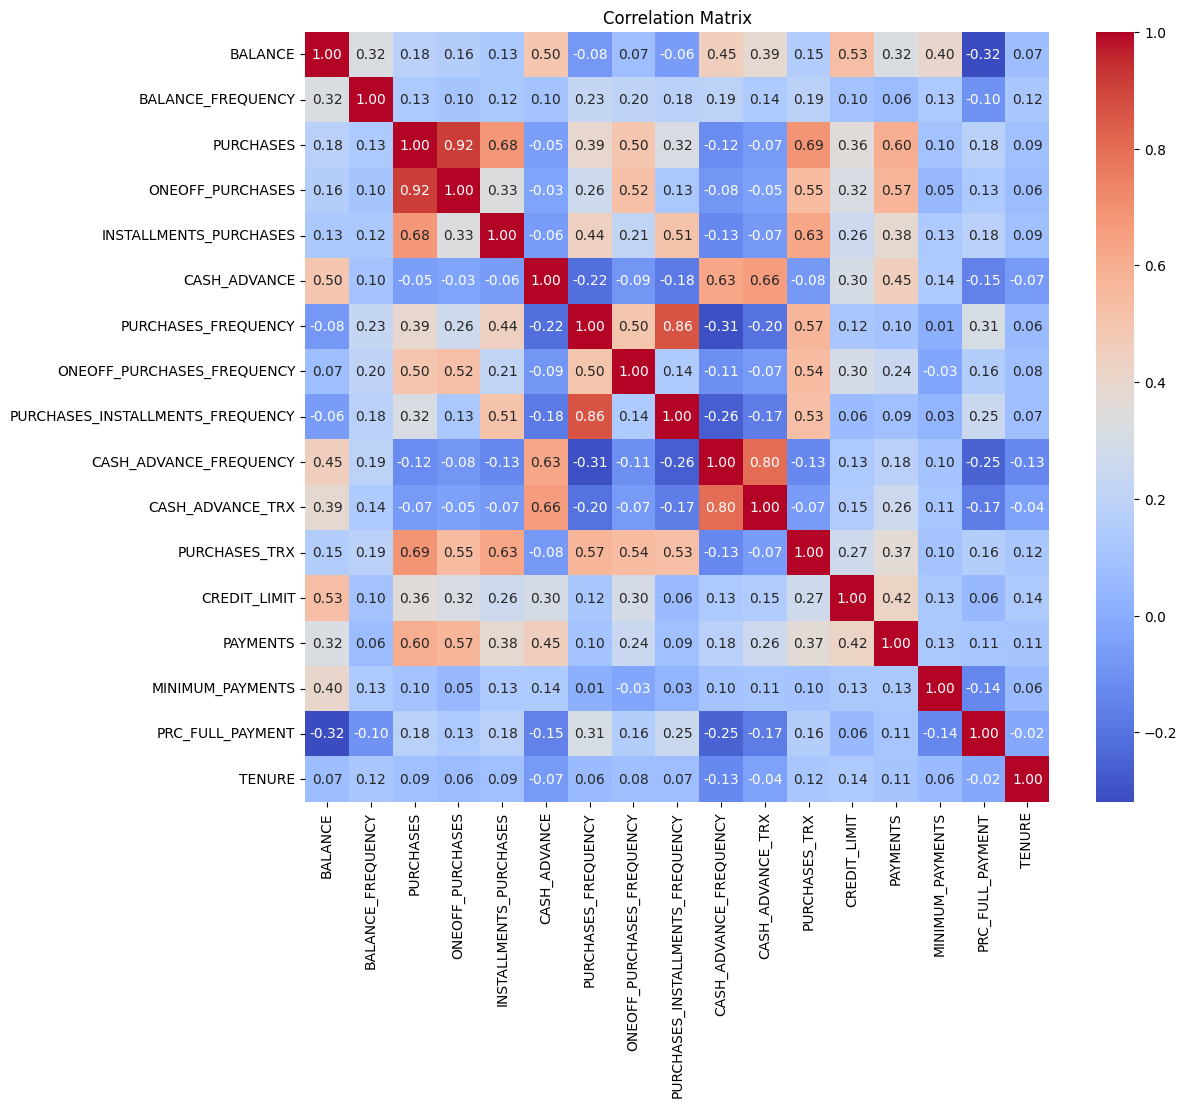

In [ ]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Outliers

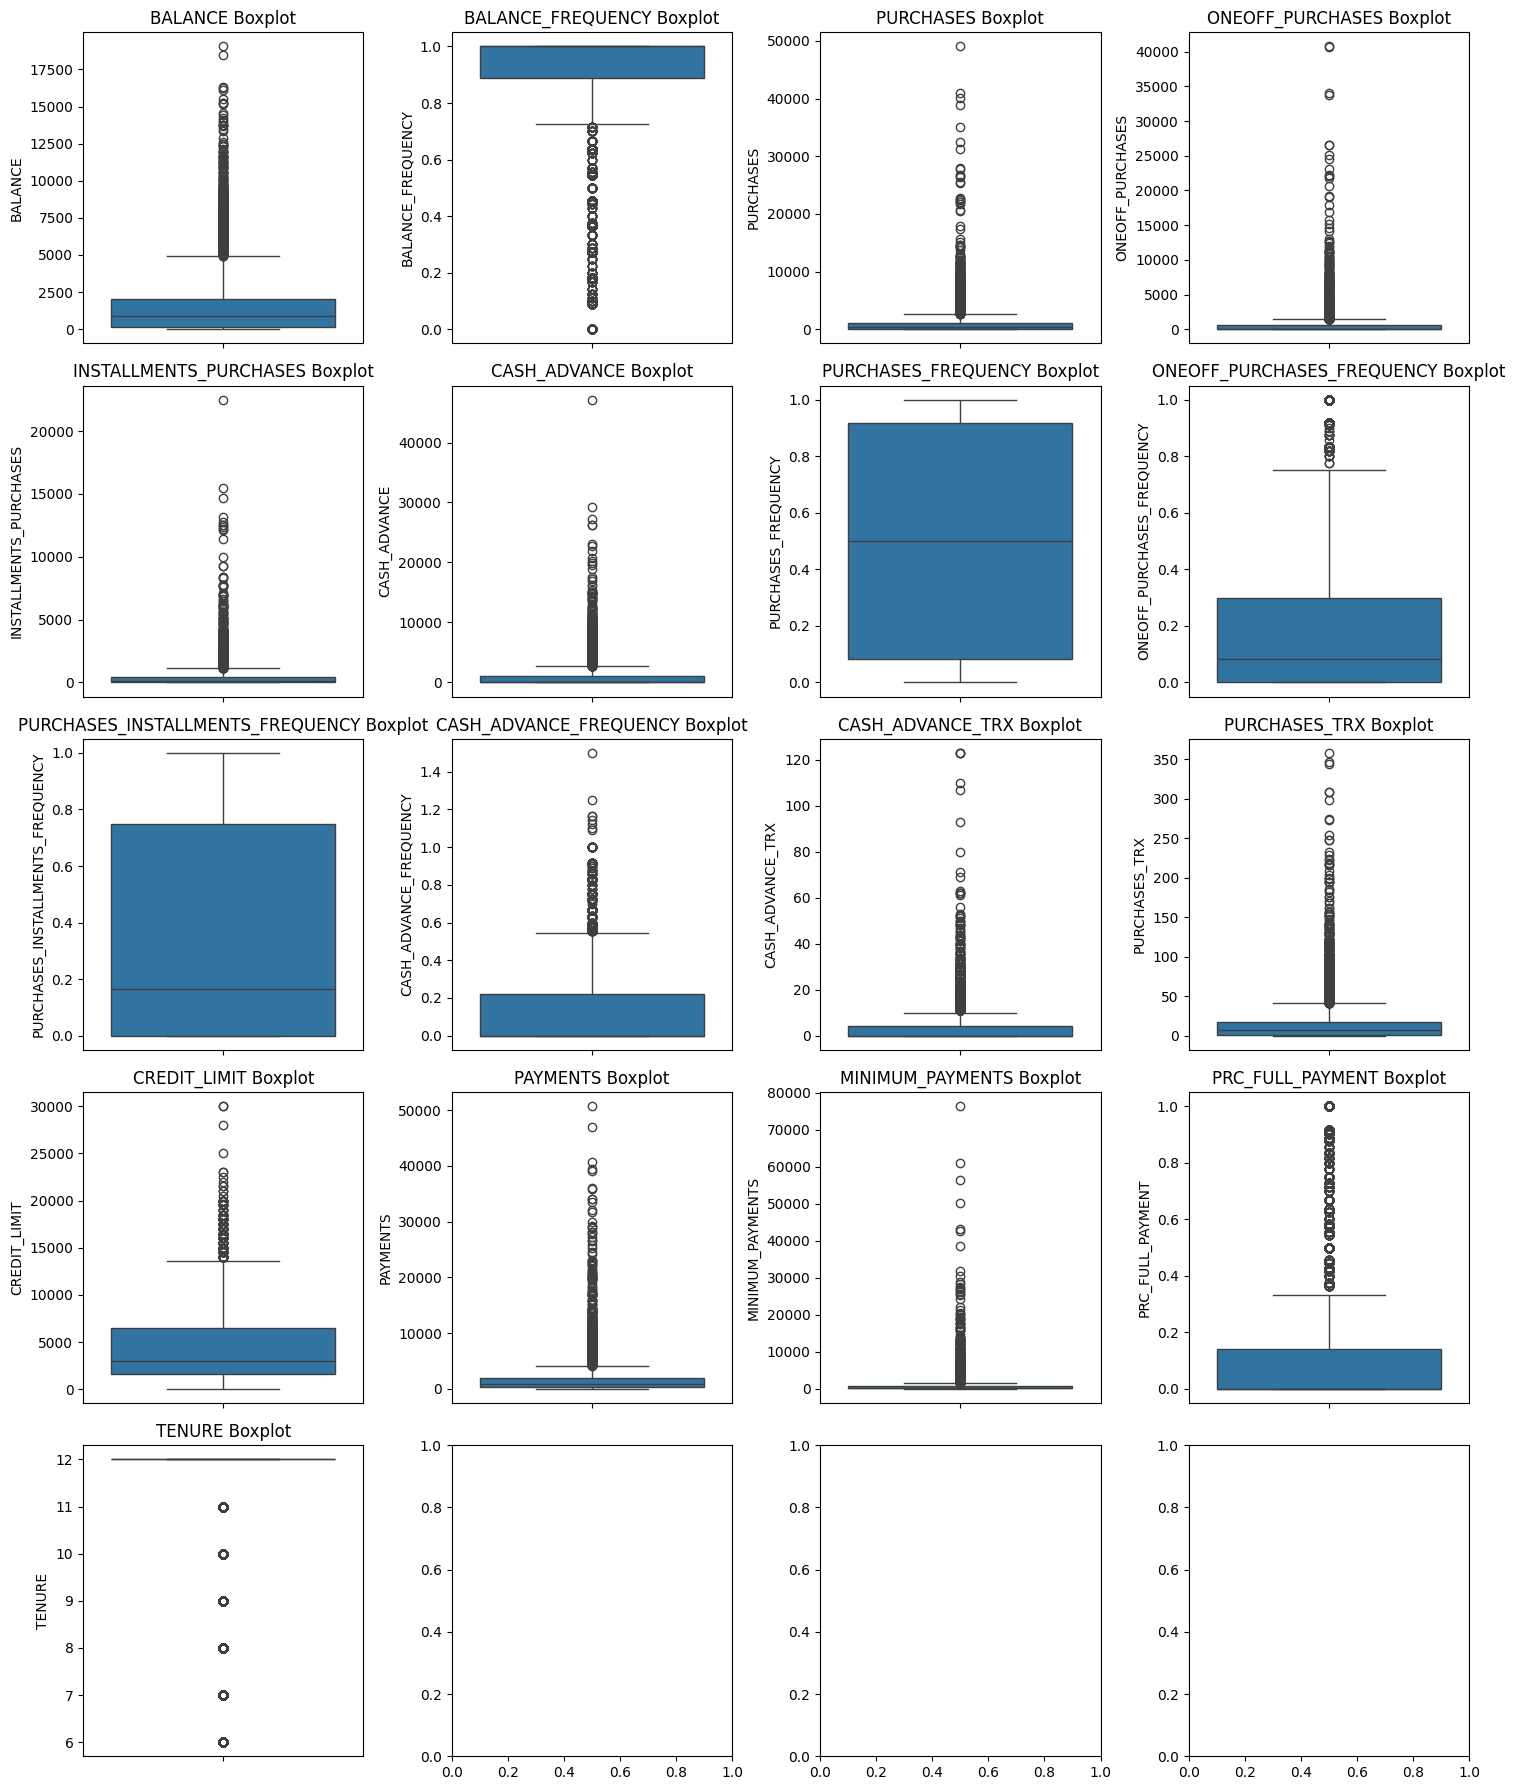

In [ ]:
# Boxplots to visualize outliers
fig, axes = plt.subplots(5, 4, figsize=(15, 18))
axes = axes.flatten()

# Loop through each numeric column and create boxplots
for i, col in enumerate(df):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

There are lots of outliers, we will clip them in columns where they are extreme to be within bounds.

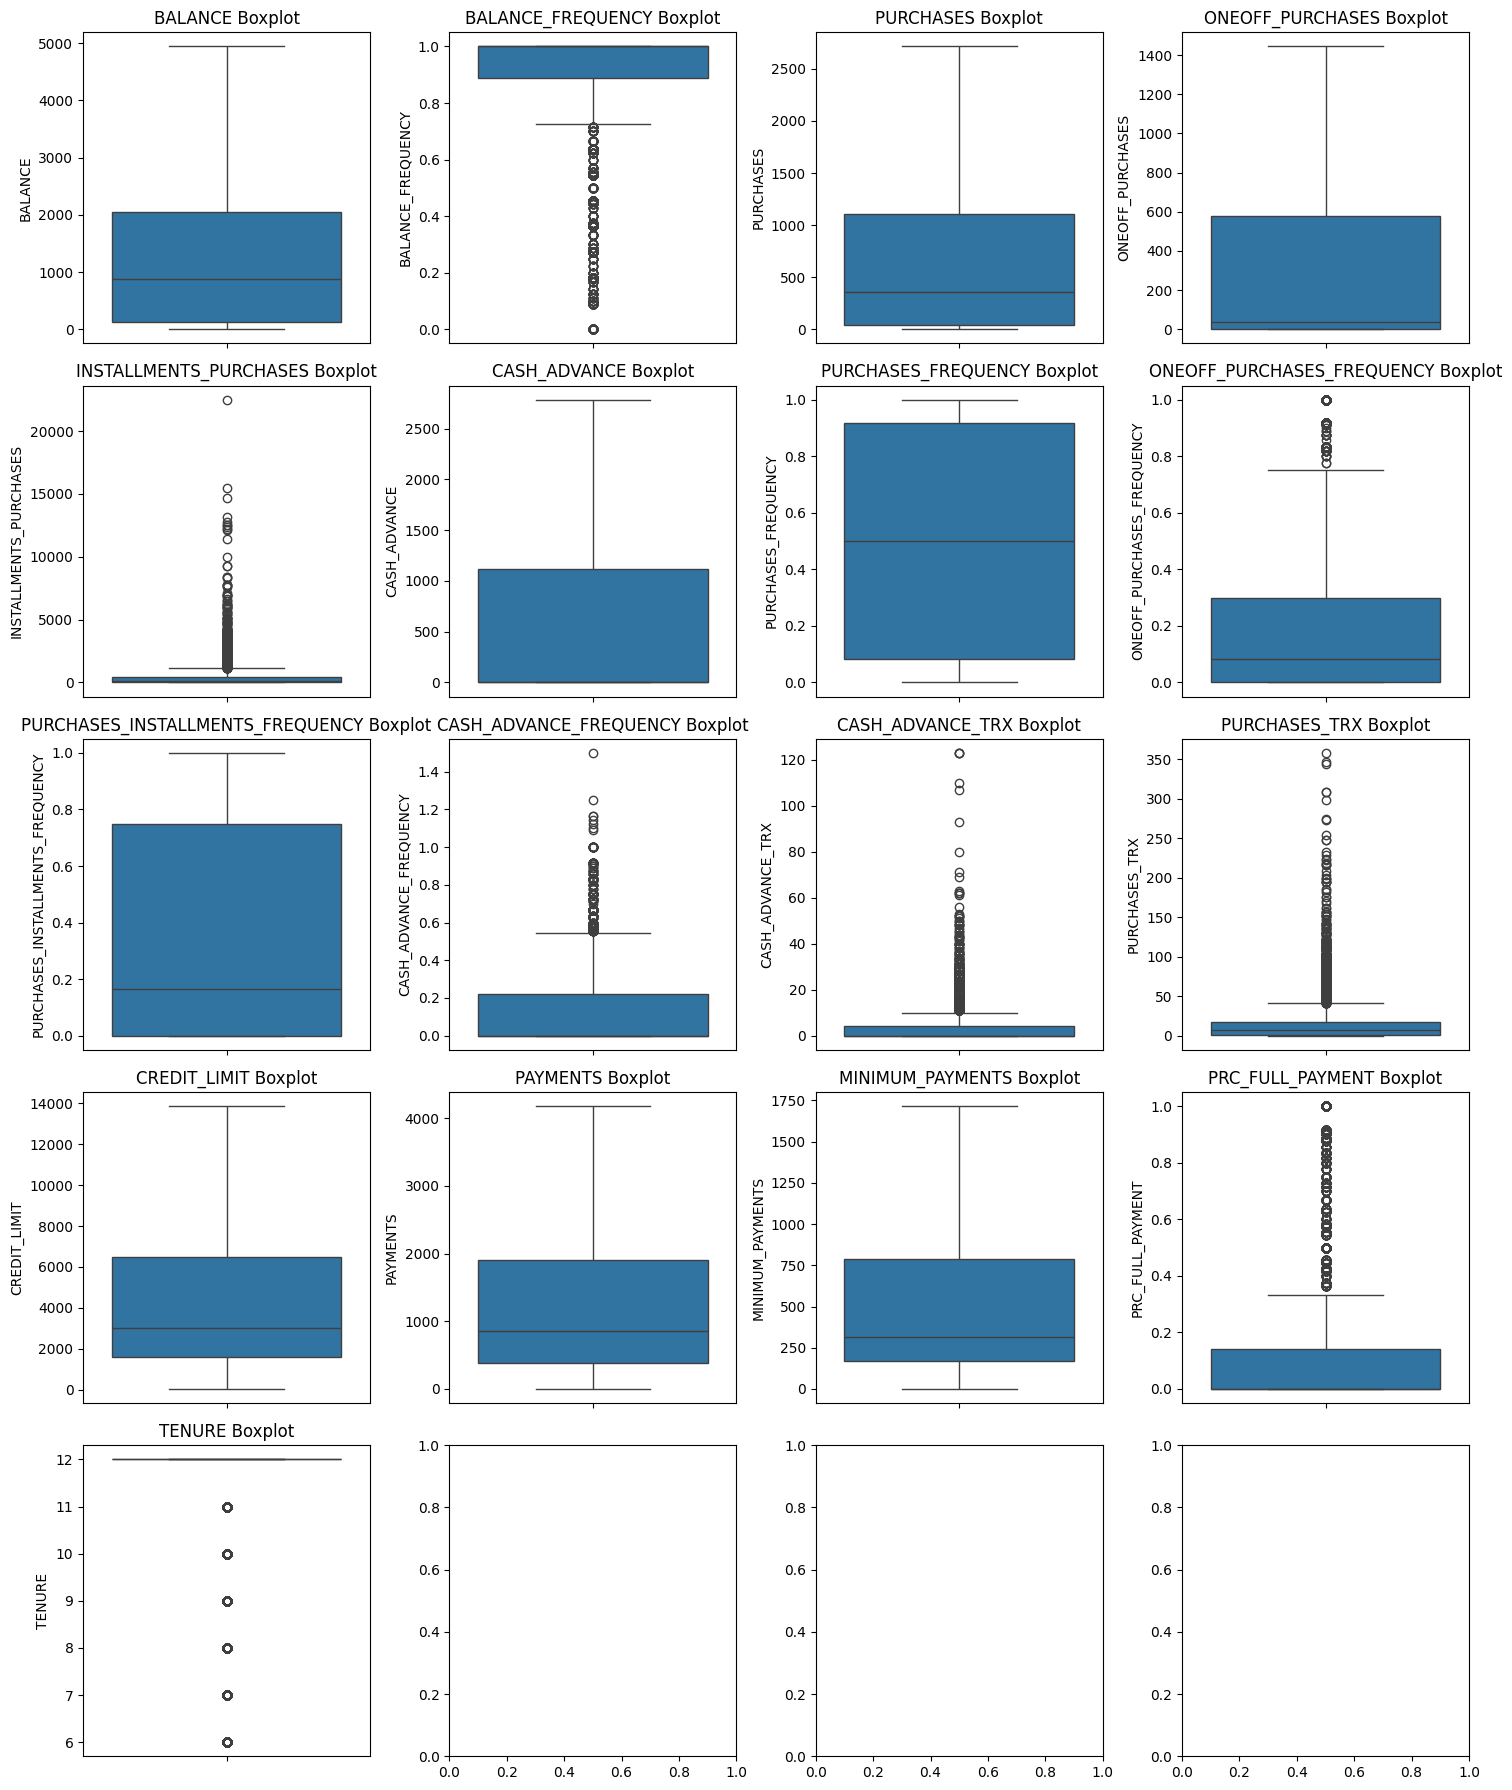

In [ ]:
# Columns with large outliers
outliers = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
    'PAYMENTS', 'MINIMUM_PAYMENTS'
]

for column in outliers:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    # Clip the values to be within the IQR bounds
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


# Visualize boxplots after clipping
fig, axes = plt.subplots(5, 4, figsize=(15, 18))
axes = axes.flatten()

# Loop through each numeric column and create boxplots
for i, col in enumerate(df):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

We don't want to clip too much as its best to retain as much valuable insights as possible on high-value customers

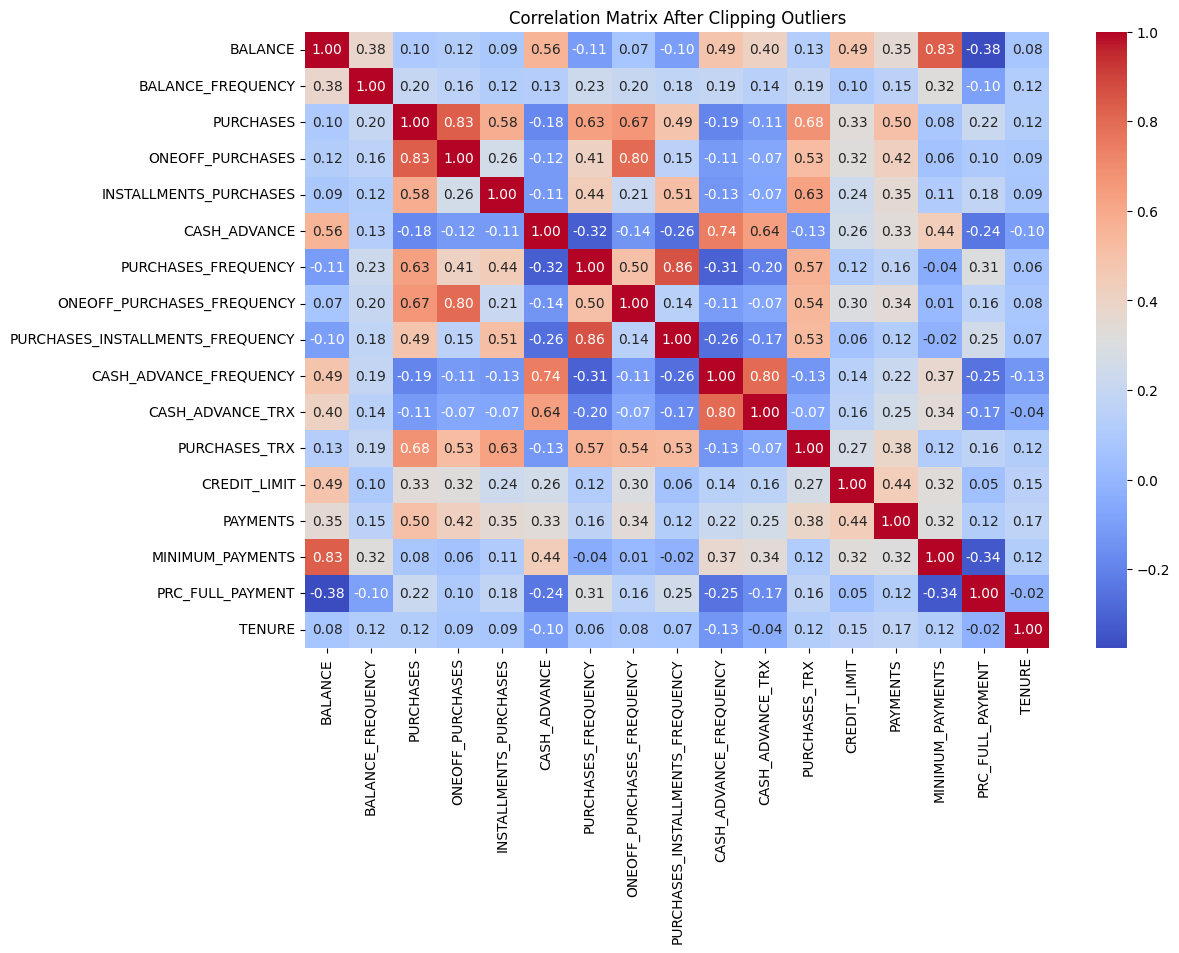

In [ ]:
# Correlation matrix after clipping outliers
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix After Clipping Outliers')
plt.show()

# **2. Exploratory Data Analysis**

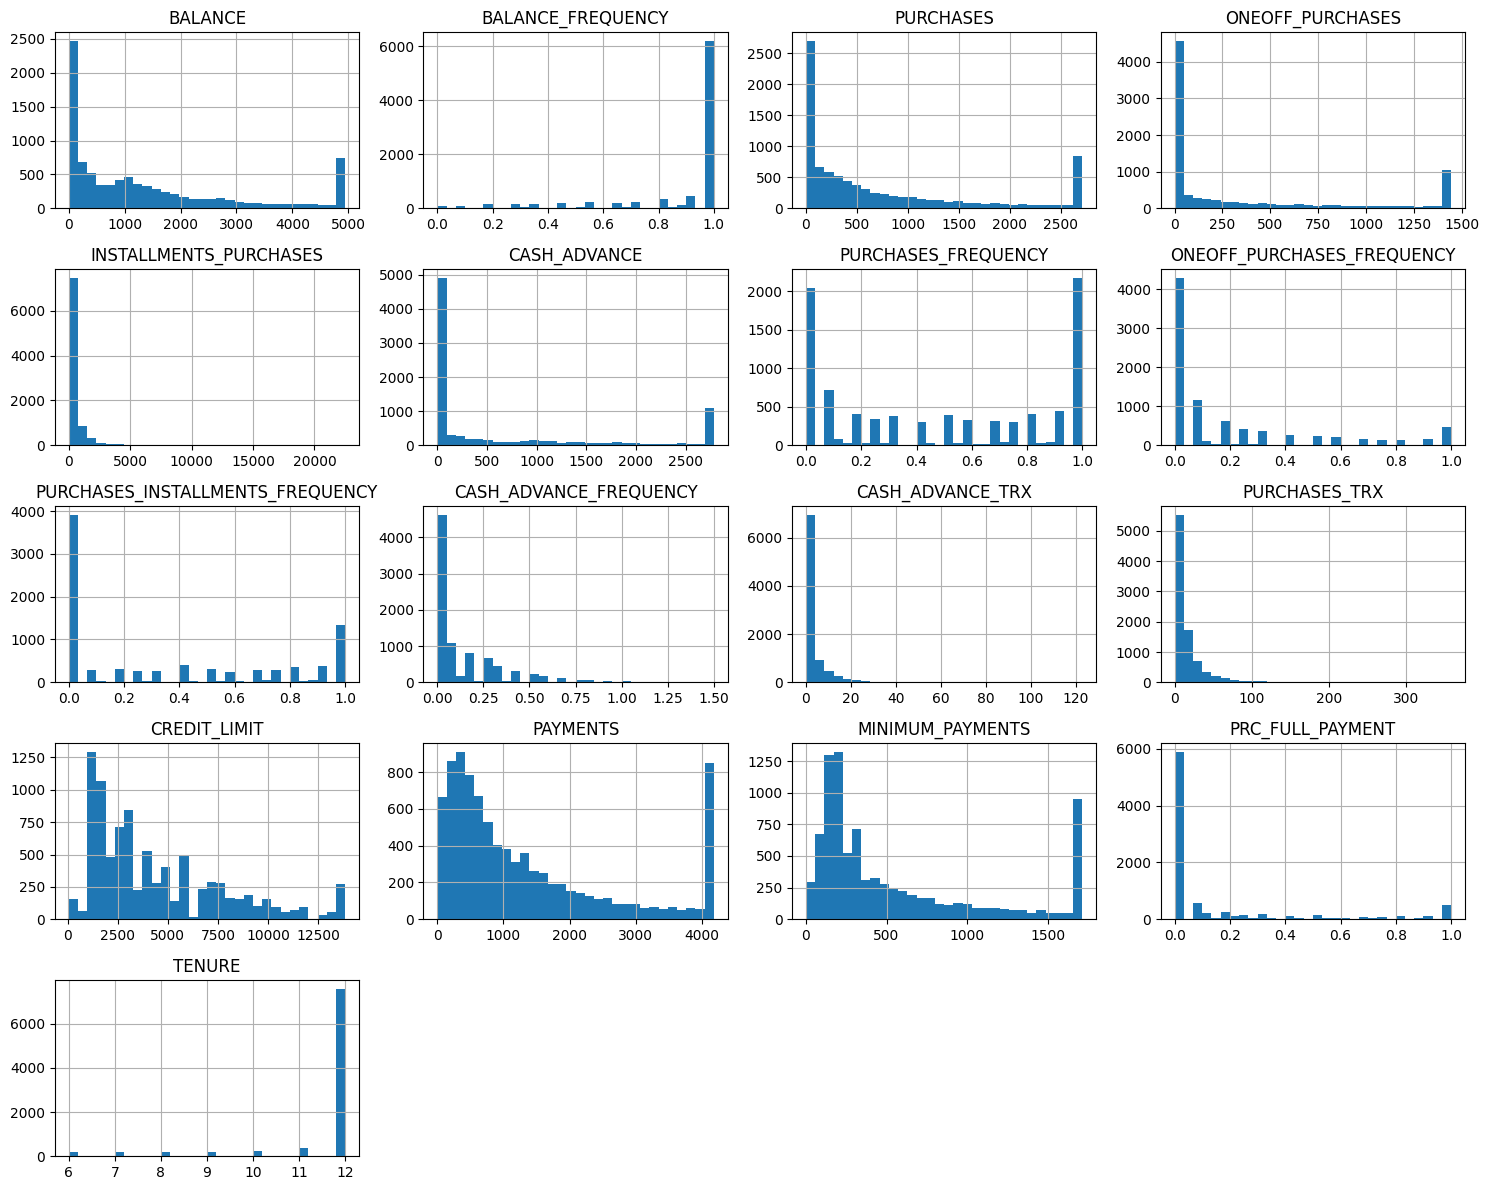

In [ ]:
# Plot histograms for all columns
df.hist(bins=30, figsize=(15, 12), layout=(5, 4))
plt.tight_layout()
plt.show()

BALANCE: Strong right skewness.

PURCHASES: Strong right skewness.

CASH_ADVANCE: Extreme skewness.

ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, and PURCHASE_FREQUENCIES: Also highly skewed, particularly with a large concentration around small values or zero.

PAYMENTS, MINIMUM_PAYMENTS, CREDIT_LIMIT: Right-skewed distributions that may require transformation to reduce the influence of extreme values.

# Customer Behaviours Investigation

**Purchasing Behaviour Relationships**

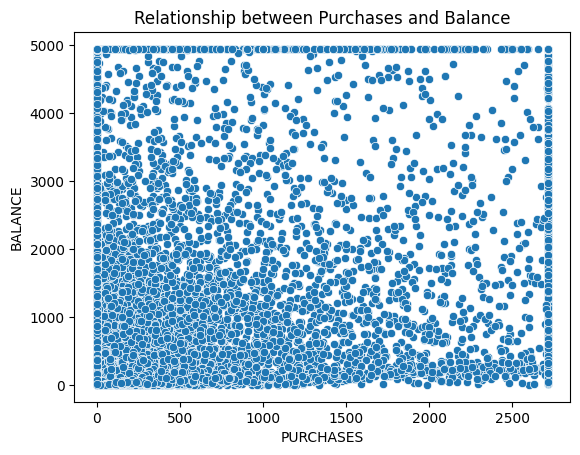

In [ ]:
sns.scatterplot(x='PURCHASES', y='BALANCE', data=df)
plt.title('Relationship between Purchases and Balance')
plt.show()

Purchases vs Balance: Customers with lower purchases tend to have balances spread across a wide range, while those with high balances also show a diverse range of purchases, indicating no direct correlation between total spending and balance.

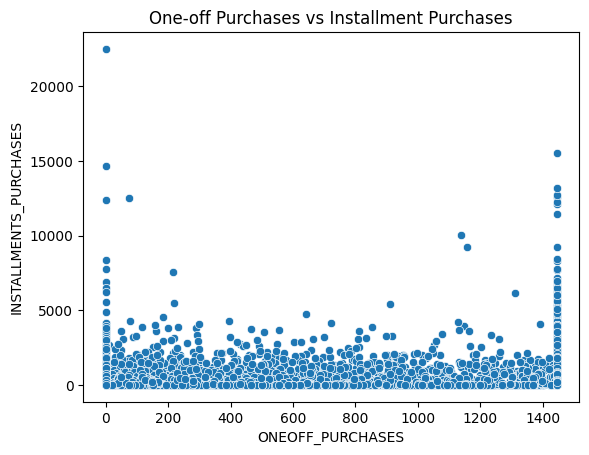

In [ ]:
sns.scatterplot(x='ONEOFF_PURCHASES', y='INSTALLMENTS_PURCHASES', data=df)
plt.title('One-off Purchases vs Installment Purchases')
plt.show()

One-off Purchases vs Installment Purchases: Customers display a wide range of installment purchases regardless of their one-off purchase amounts, indicating no strong correlation between the two.

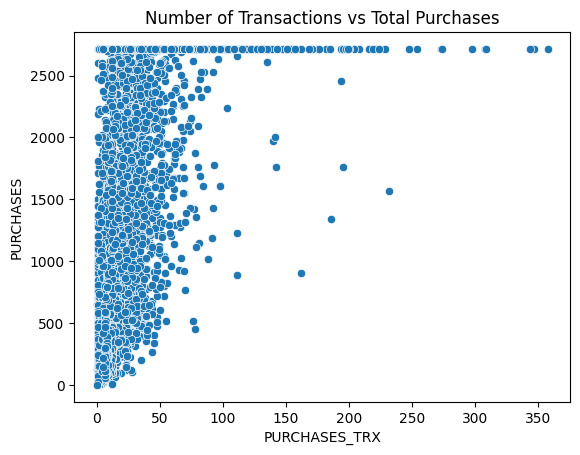

In [ ]:
sns.scatterplot(x='PURCHASES_TRX', y='PURCHASES', data=df)
plt.title('Number of Transactions vs Total Purchases')
plt.show()

Number of Transactions vs Total Purchases: Customers with fewer transactions tend to have a wide range of total purchase amounts, while those with higher transactions consistently maintain high purchase values, suggesting a positive correlation between the two.

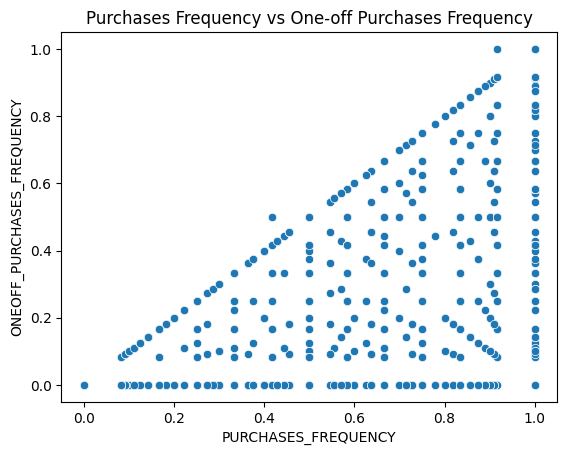

In [ ]:
sns.scatterplot(x='PURCHASES_FREQUENCY', y='ONEOFF_PURCHASES_FREQUENCY', data=df)
plt.title('Purchases Frequency vs One-off Purchases Frequency')
plt.show()

Purchases Frequency vs One-off Purchases Frequency: Customers who make frequent purchases tend to have a higher frequency of one-off purchases, indicating a strong correlation between overall purchasing habits and one-time transaction behaviour.

**Credit Usage Relationships**

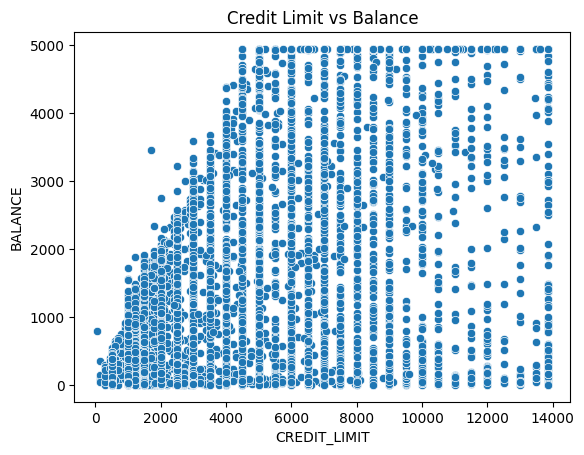

In [ ]:
# Credit Limit vs Balance
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=df)
plt.title('Credit Limit vs Balance')
plt.show()

Credit Limit vs Balance: Customers with a higher credit limit also tend to have higher balances, but the distribution of balances is spread widely across different credit limit levels, showing no direct proportional relationship between them.

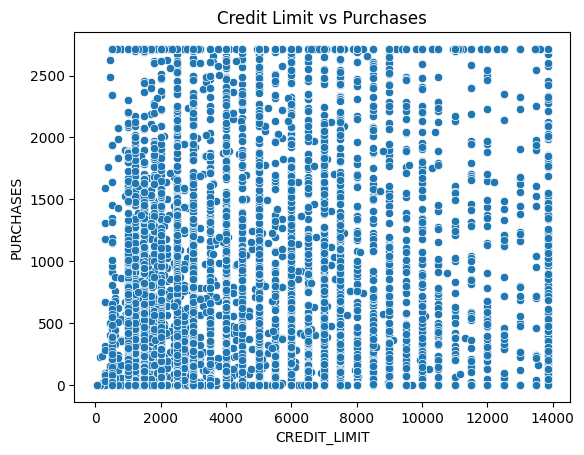

In [ ]:
# Credit Limit vs Purchases
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES', data=df)
plt.title('Credit Limit vs Purchases')
plt.show()

Credit Limit vs Purchases:  Higher credit limits do not consistently result in higher purchases, as there is a wide range of purchase amounts across all credit limit levels.

**Cash Advance Behaviour**

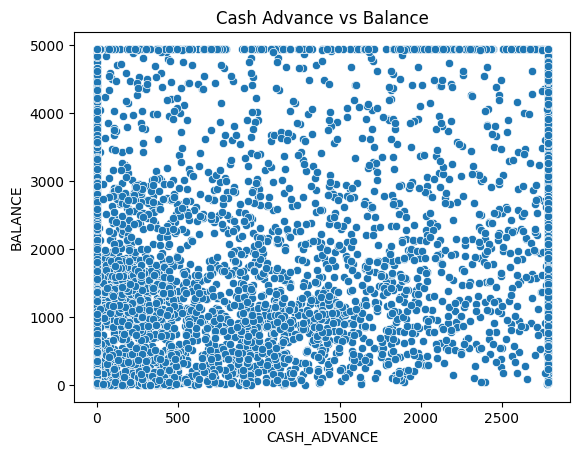

In [ ]:
# Cash Advance vs Balance
sns.scatterplot(x='CASH_ADVANCE', y='BALANCE', data=df)
plt.title('Cash Advance vs Balance')
plt.show()

Cash Advance vs Balance: Customers who take cash advances display varying balances, with no clear trend or direct relationship between the amount of cash advance and their balance.

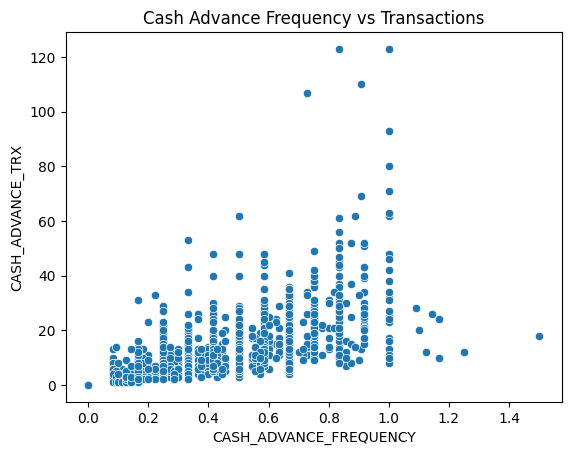

In [ ]:
# Cash Advance Frequency vs Cash Advance Transactions
sns.scatterplot(x='CASH_ADVANCE_FREQUENCY', y='CASH_ADVANCE_TRX', data=df)
plt.title('Cash Advance Frequency vs Transactions')
plt.show()

Cash Advance Frequency vs Transactions: As the frequency of cash advances increases, the number of transactions rises, indicating that frequent cash advance users are generally more active in their credit card usage.

**Payment Behaviour**

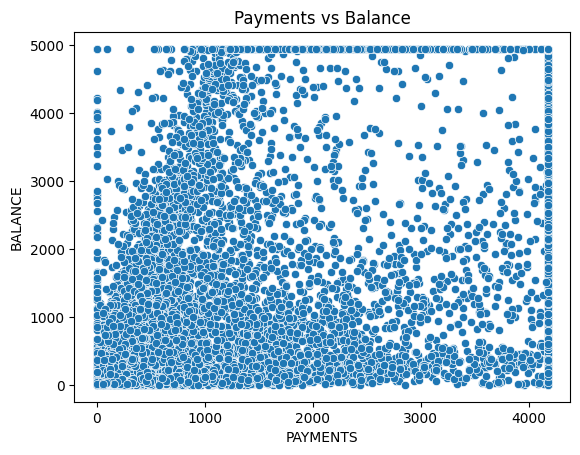

In [ ]:
# Payments vs Balance
sns.scatterplot(x='PAYMENTS', y='BALANCE', data=df)
plt.title('Payments vs Balance')
plt.show()

Payments vs Balance: Higher payments generally correspond to higher balances, but some customers with lower payments also maintain high balances, showing a diverse range of behaviours in paying off their balances.

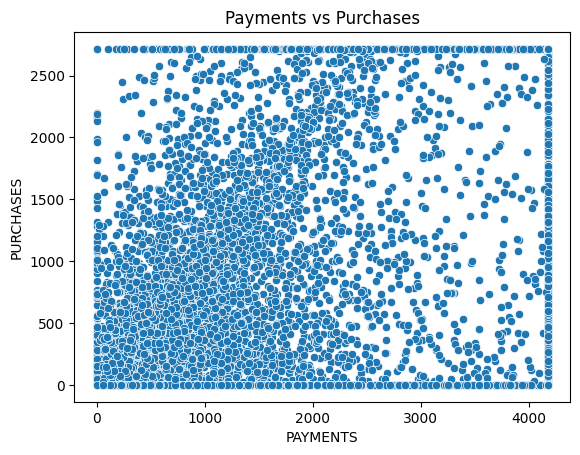

In [ ]:
# Payments vs Purchases
sns.scatterplot(x='PAYMENTS', y='PURCHASES', data=df)
plt.title('Payments vs Purchases')
plt.show()

Payments vs Purchases: Customers with higher payments tend to have higher purchase totals, though there is a wide spread of payment amounts relative to purchases.

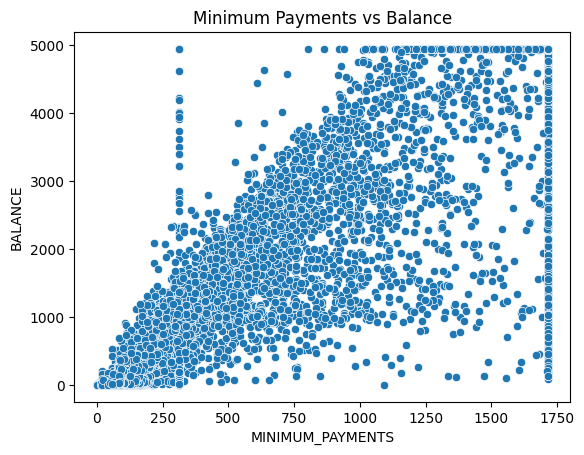

In [ ]:
# Minimum Payments vs Balance
sns.scatterplot(x='MINIMUM_PAYMENTS', y='BALANCE', data=df)
plt.title('Minimum Payments vs Balance')
plt.show()

Minimum Payments vs Balance: There is a positive relationship between minimum payments and balance, meaning customers with higher balances tend to have higher minimum payment obligations.



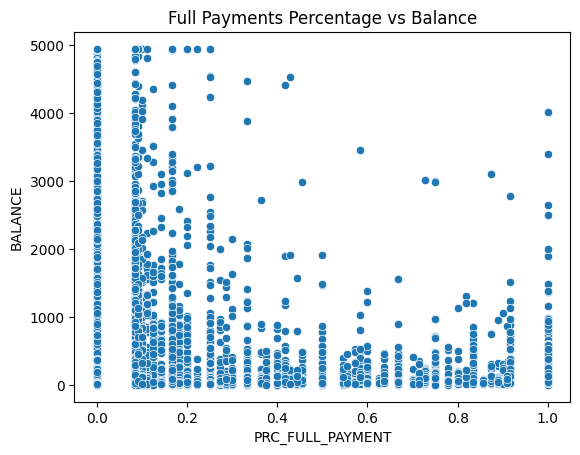

In [ ]:
# Full Payments Percentage vs Balance
sns.scatterplot(x='PRC_FULL_PAYMENT', y='BALANCE', data=df)
plt.title('Full Payments Percentage vs Balance')
plt.show()

Full Payments Percentage vs Balance: Customers who make partial payments (lower full payment percentages) tend to have a wide range of balances, while those who pay their balances in full show more variability in their balances as well.

# Feature Engineering

For feature engineering, we are going to add Balance to Credit Ratio and Payments to Purchases Ratio as new features to help give us a deeper understanding of customer behaviour.

Balance to Credit Ratio helps us see how customers are utilizing their available credit.

In [ ]:
# Balance to Credit ratio to get insight on how much credit is being utilized
df['BALANCE_TO_CREDIT_RATIO'] = df['BALANCE'] / df['CREDIT_LIMIT']

Payments to Purchases Ratio offers insights to customers' repayment habits relative to their spending.

In [ ]:
# Payments to Purchases ratio to show how much of the customers purchases is paying off
df['PAYMENTS_TO_PURCHASES_RATIO'] = df['PAYMENTS'] / df['PURCHASES']

In [ ]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40             0.000   
C10002   3202.467416           0.909091       0.00             0.000   
C10003   2495.148862           1.000000     773.17           773.170   
C10004   1666.670542           0.636364    1499.00          1444.575   
C10005    817.714335           1.000000      16.00            16.000   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   2784.671635             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
C10001         1000.0   201.802084        139.509787          0.000000   
C10002         7000.0  4103.032597       1072.340217          0.222222   
C10003         7500.0   622.066742        627.284787          0.000000   
C10004         7500.0     0.000000        312.452292          0.000000   
C10005         1200.0   678.334763        244.791237          0.000000   

         TENURE  BALANCE_TO_CREDIT_RATIO  PAYMENTS_TO_PURCHASES_RATIO  
CUST_ID                                                                
C10001       12                 0.040901                     2.115326  
C10002       12                 0.457495                          inf  
C10003       12                 0.332687                     0.804567  
C10004       12                 0.222223                     0.000000  
C10005       12                 0.681429                    42.395923

In [ ]:
# Check for inf and -inf in BALANCE_TO_CREDIT_RATIO and PAYMENT_TO_PURCHASES_RATIO
print(df['BALANCE_TO_CREDIT_RATIO'].isin([np.inf, -np.inf]).sum())
print(df['PAYMENTS_TO_PURCHASES_RATIO'].isin([np.inf, -np.inf]).sum())

# Check for NaN values
print(df['BALANCE_TO_CREDIT_RATIO'].isnull().sum())
print(df['PAYMENTS_TO_PURCHASES_RATIO'].isnull().sum())

0
1975
0
68


Text(0.5, 1.0, 'Distribution of PAYMENTS_TO_PURCHASES_RATIO')

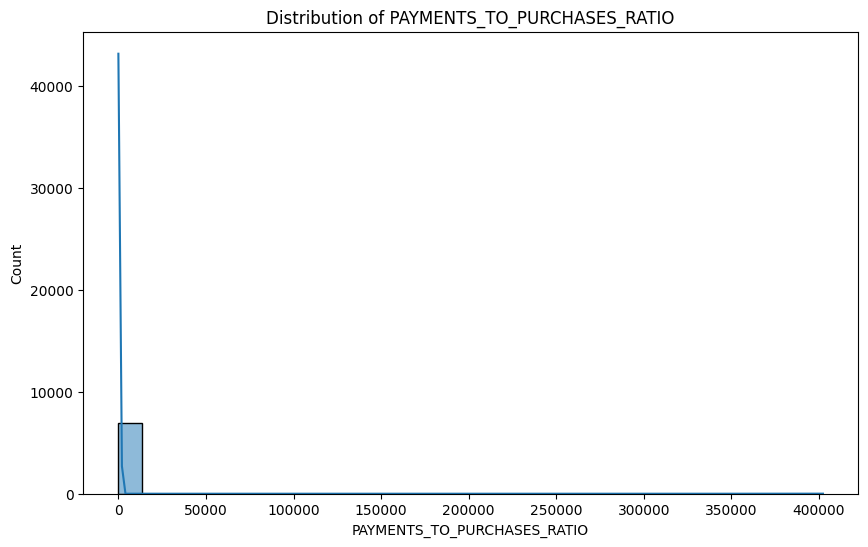

In [ ]:
# Check distribution of PAYMENTS_TO_PURCHASES_RATIO column
plt.figure(figsize=(10, 6))
sns.histplot(df['PAYMENTS_TO_PURCHASES_RATIO'], bins=30, kde=True)
plt.title('Distribution of PAYMENTS_TO_PURCHASES_RATIO')

In [ ]:
# Replace inf, -inf and NaN in PAYMENTS_TO_PURCHASES_RATIO
# Impute NaN and infinite values with the median given the distribution and skew
median_value = df['PAYMENTS_TO_PURCHASES_RATIO'].median()
df['PAYMENTS_TO_PURCHASES_RATIO'].replace([np.inf, -np.inf], median_value, inplace=True)
df['PAYMENTS_TO_PURCHASES_RATIO'].fillna(median_value, inplace=True)

<ipython-input-46-5d5848d47490>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PAYMENTS_TO_PURCHASES_RATIO'].replace([np.inf, -np.inf], median_value, inplace=True)
<ipython-input-46-5d5848d47490>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [ ]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40             0.000   
C10002   3202.467416           0.909091       0.00             0.000   
C10003   2495.148862           1.000000     773.17           773.170   
C10004   1666.670542           0.636364    1499.00          1444.575   
C10005    817.714335           1.000000      16.00            16.000   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   2784.671635             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
C10001         1000.0   201.802084        139.509787          0.000000   
C10002         7000.0  4103.032597       1072.340217          0.222222   
C10003         7500.0   622.066742        627.284787          0.000000   
C10004         7500.0     0.000000        312.452292          0.000000   
C10005         1200.0   678.334763        244.791237          0.000000   

         TENURE  BALANCE_TO_CREDIT_RATIO  PAYMENTS_TO_PURCHASES_RATIO  
CUST_ID                                                                
C10001       12                 0.040901                     2.115326  
C10002       12                 0.457495                     1.623075  
C10003       12                 0.332687                     0.804567  
C10004       12                 0.222223                     0.000000  
C10005       12                 0.681429                    42.395923

We want to check the correlation of all features prior to building the cluster models as to make sure we are not including features that are highly correlated to prevent multicollinearity.

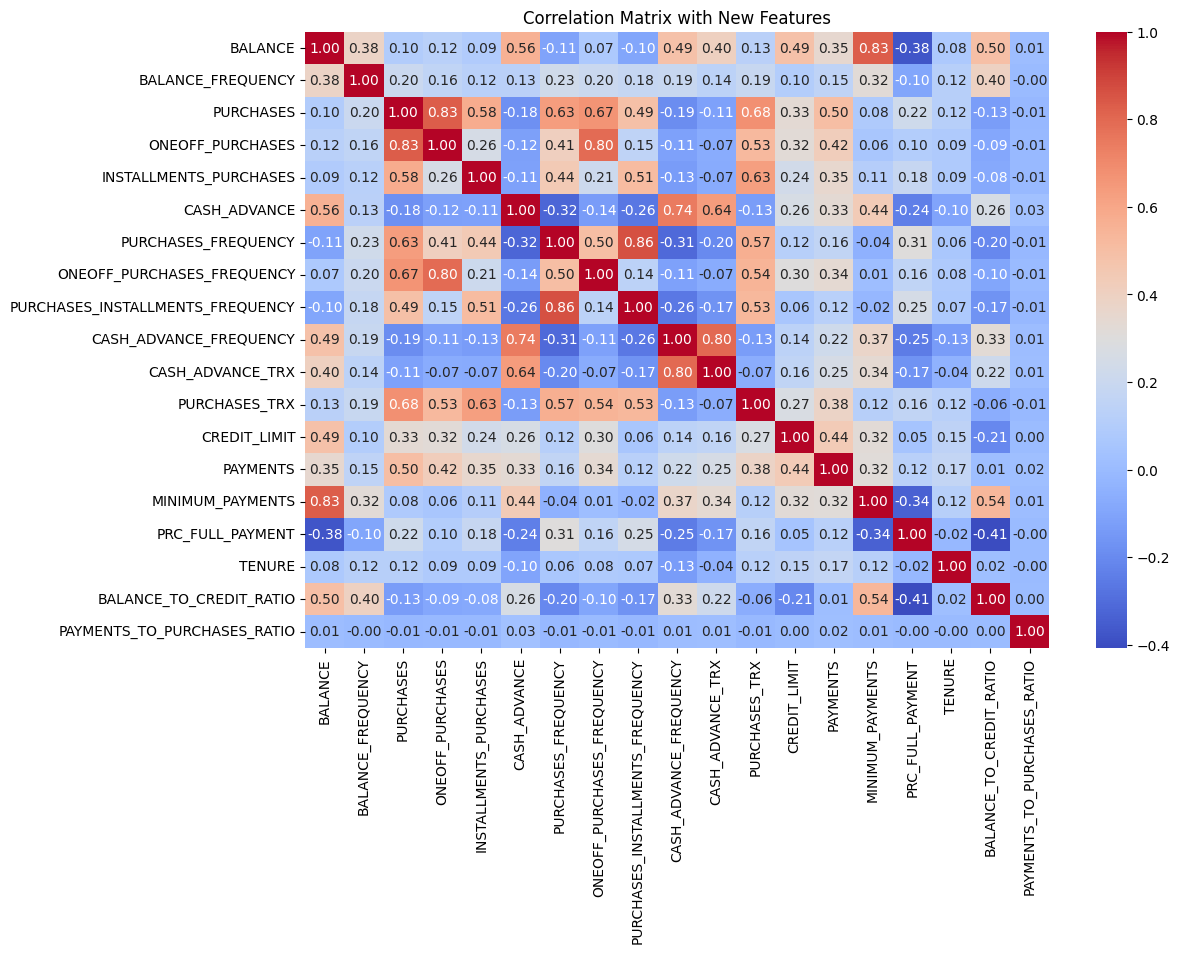

In [ ]:
# Correlation matrix with new features
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with New Features')
plt.show()

**Strongly Correlated Features**

* PURCHASES_INSTALLMENTS_FREQUENCY and INSTALLMENTS_PURCHASES: 0.86
  * Customers with frequent installment purchases tend to have higher installment purchases overall.


* BALANCE and MINIMUM_PAYMENTS: 0.83
  * Customers with higher balances tend to make larger minimum payments.

* ONEOFF_PURCHASES and PURCHASES: 0.83
  * One-off purchases strongly contribute to overall purchases.

* CASH_ADVANCE_TRX and CASH_ADVANCE: 0.80
  * A high number of cash advance transactions is strongly linked to larger cash advance amounts.

* CASH_ADVANCE and CASH_ADVANCE_FREQUENCY: 0.74
  * Customers who frequently take cash advances also tend to take larger amounts.

**Moderately Correlated Features**
* BALANCE and BALANCE_TO_CREDIT_RATIO: 0.57
  * As balance increases relative to the credit limit, this ratio also increases.

* BALANCE and CREDIT_LIMIT: 0.49
  * Higher credit limits are moderately associated with higher balances.

* PURCHASES and PAYMENTS: 0.62
  * Customers who make more purchases tend to make more payments.

* MINIMUM_PAYMENTS and PAYMENTS: 0.65
  * Customers with higher payments tend to also have higher minimum payments due.

* PURCHASES and ONEOFF_PURCHASES_FREQUENCY: 0.67
  * Customers with higher purchases tend to make more frequent one-off purchases.

**Important Negative Correlations**
* BALANCE_TO_CREDIT_RATIO and CREDIT_LIMIT: -0.60
  * Indicates that as credit limit increases, the balance-to-credit ratio decreases.

* PRC_FULL_PAYMENT and BALANCE: -0.38
  * Higher balances tend to correspond with a lower percentage of full payments being made.

* PRC_FULL_PAYMENT and MINIMUM_PAYMENTS: -0.34
  * Customers making larger minimum payments tend to make a smaller percentage of full payments.


# Feature Importance
Doing feature importance to get a rough sense as to which features contribute most to variance. This will also help us decide which features will be included in the cluster models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
# Random forest for feature importance (use a dummy target)
dummy_target = np.random.randint(0, 3, size=df.shape[0])
rf = RandomForestClassifier(random_state=42)
rf.fit(df, dummy_target)

RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances
importances = rf.feature_importances_

In [ ]:
# Create a dataframe of feature importances
importance_df = pd.DataFrame({'Feature': df.columns, 'Importance': importances})

In [ ]:
# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

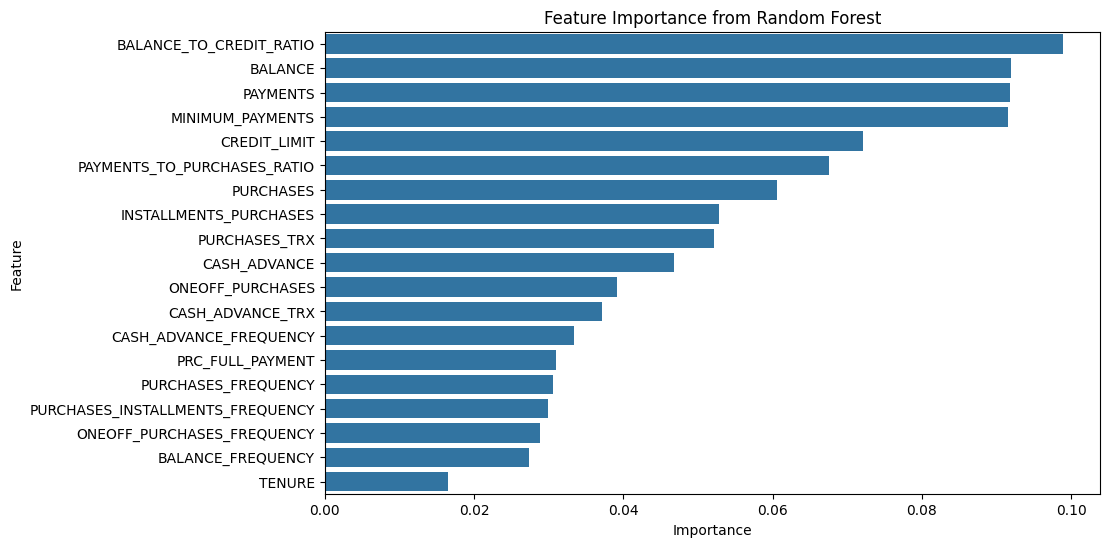

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

Based on the correlation matrix and feature importance, we will only add the most relevant features in the model to avoid multicollinearity and redundancy.

# Clustering Preprocessing

In [ ]:
# Selecting the most relevant features for the model that also avoid multicollinearity
selected_features = ['BALANCE_TO_CREDIT_RATIO', 'PAYMENTS_TO_PURCHASES_RATIO',
                     'BALANCE', 'PAYMENTS', 'PURCHASES', 'CREDIT_LIMIT']

In [ ]:
df_selected = df[selected_features]

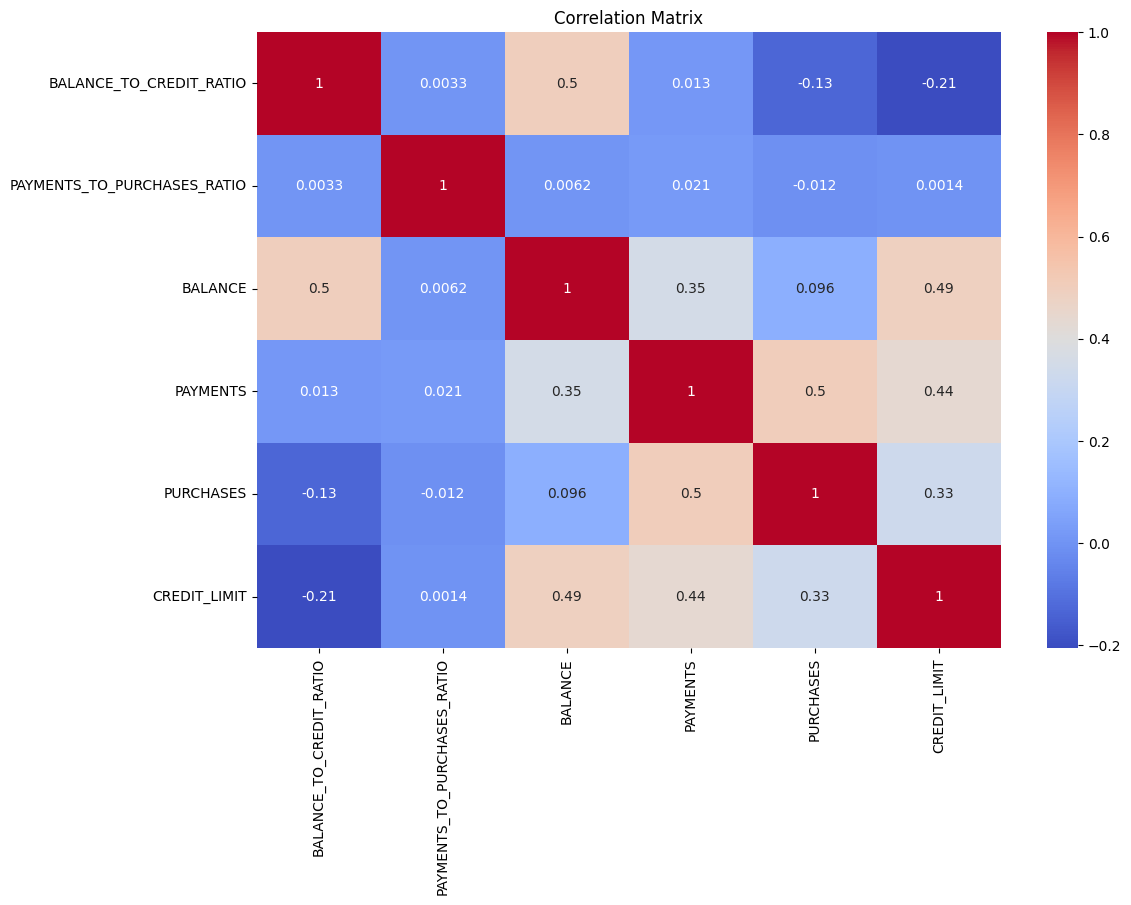

In [ ]:
# Checking to make sure the features are not highly correlated before scaling and putting into models
corr_matrix = df_selected.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **3. Clustering Algorithms**

We are aiming to test a diverse set of algorithmsnto evaluate their performance on this dataset.

We deliberately chose not to use K-Means for this analysis, as it assumes that clusters are spherical and of equal size. This assumption would not perform well with our dataset, given the complex and overlapping nature of the data.

Instead, we focused on algorithms that allow for more flexible cluster shapes and better separation, which are critical for uncovering nuanced insights. This includes MeanShift, Birch, Agglomerative, DBScan and Spectral Clustering.

StandardScaler – MeanShift Silhouette Score: 0.5034257663430735
StandardScaler – MeanShift Cluster Counts:
0    8945
2       1
3       1
4       1
1       1
Name: count, dtype: int64

StandardScaler – Birch Silhouette Score: 0.9307006717982643
StandardScaler – Birch Cluster Counts:
0    8947
1       1
2       1
Name: count, dtype: int64

StandardScaler – Agglomerative Silhouette Score: 0.3318247805413136
StandardScaler – Agglomerative Cluster Counts:
0    6071
1    2877
2       1
Name: count, dtype: int64

StandardScaler – Gaussian Mixture Silhouette Score: 0.22505199908069637
StandardScaler – GMM Cluster Counts:
2    4660
1    4158
0     131
Name: count, dtype: int64



/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


StandardScaler – Spectral Clustering Silhouette Score: 0.8840895083970505
StandardScaler – Spectral Clustering Cluster Counts:
0    8948
1       1
Name: count, dtype: int64

MinMaxScaler – MeanShift Silhouette Score: 0.4478544104319589
MinMaxScaler – MeanShift Cluster Counts:
0    8947
2       1
1       1
Name: count, dtype: int64

MinMaxScaler – Birch Silhouette Score: 0.43751276262274885
MinMaxScaler – Birch Cluster Counts:
2    5765
0    1841
1    1343
Name: count, dtype: int64

MinMaxScaler – Agglomerative Silhouette Score: 0.3911444135068799
MinMaxScaler – Agglomerative Cluster Counts:
1    5459
0    1988
2    1502
Name: count, dtype: int64

MinMaxScaler – Gaussian Mixture Silhouette Score: 0.1684961635787169
MinMaxScaler – GMM Cluster Counts:
2    4466
0    3686
1     797
Name: count, dtype: int64

MinMaxScaler – Spectral Clustering Silhouette Score: 0.4570836415092022
MinMaxScaler – Spectral Clustering Cluster Counts:
0    6589
2    1193
1    1167
Name: count, dtype: int64

Robu

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


RobustScaler – Spectral Clustering Silhouette Score: -0.6625888278091401
RobustScaler – Spectral Clustering Cluster Counts:
0    8948
1       1
Name: count, dtype: int64



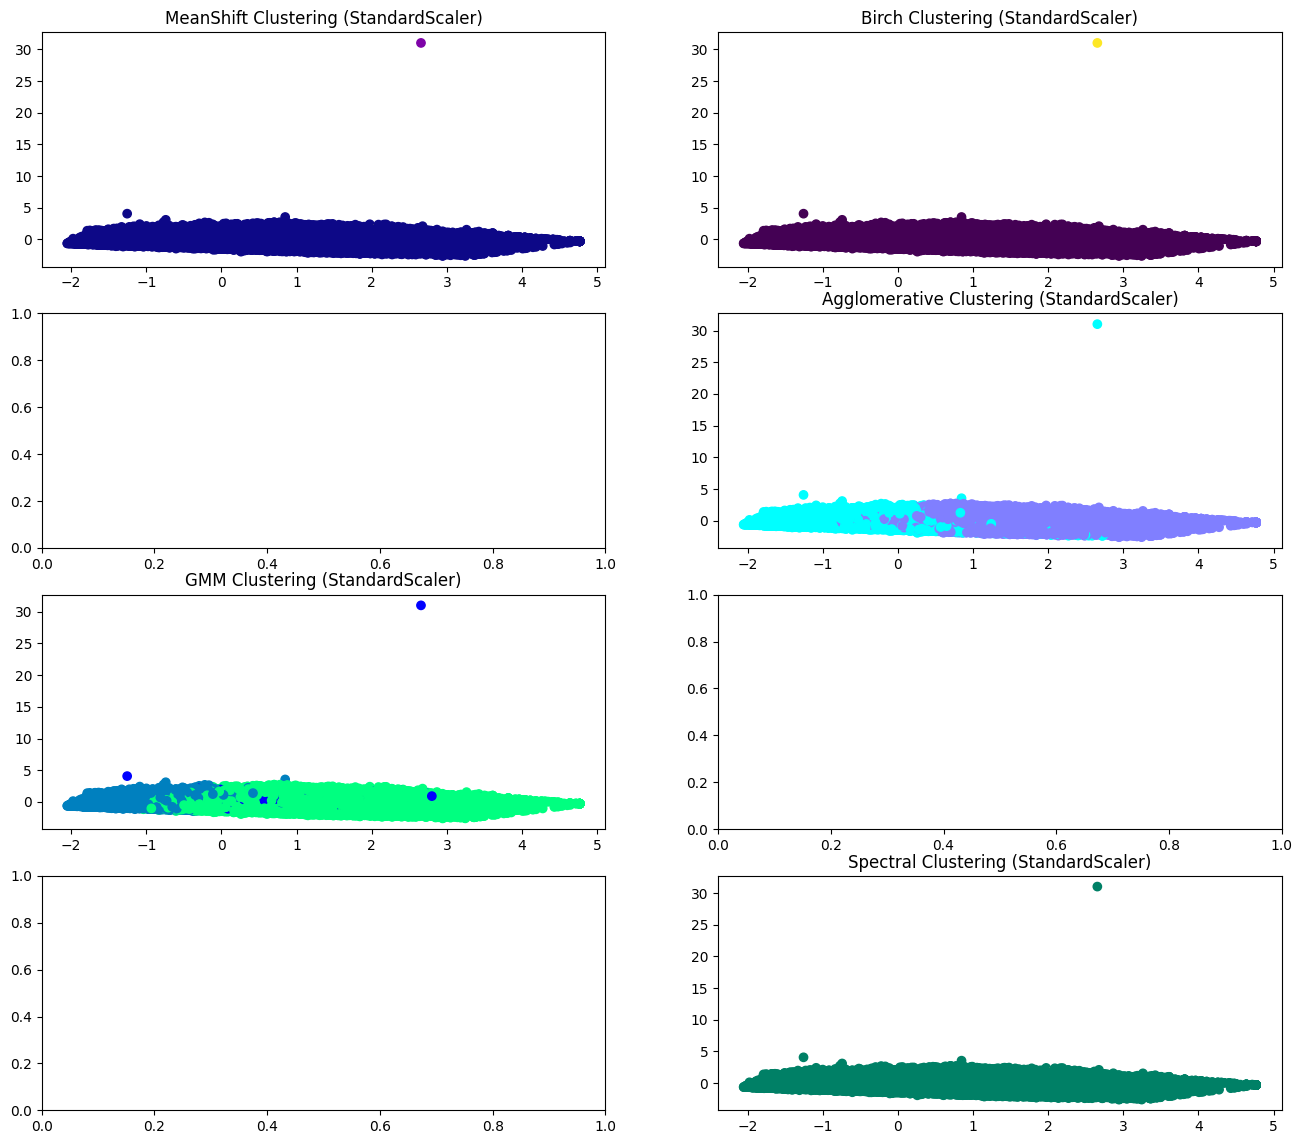

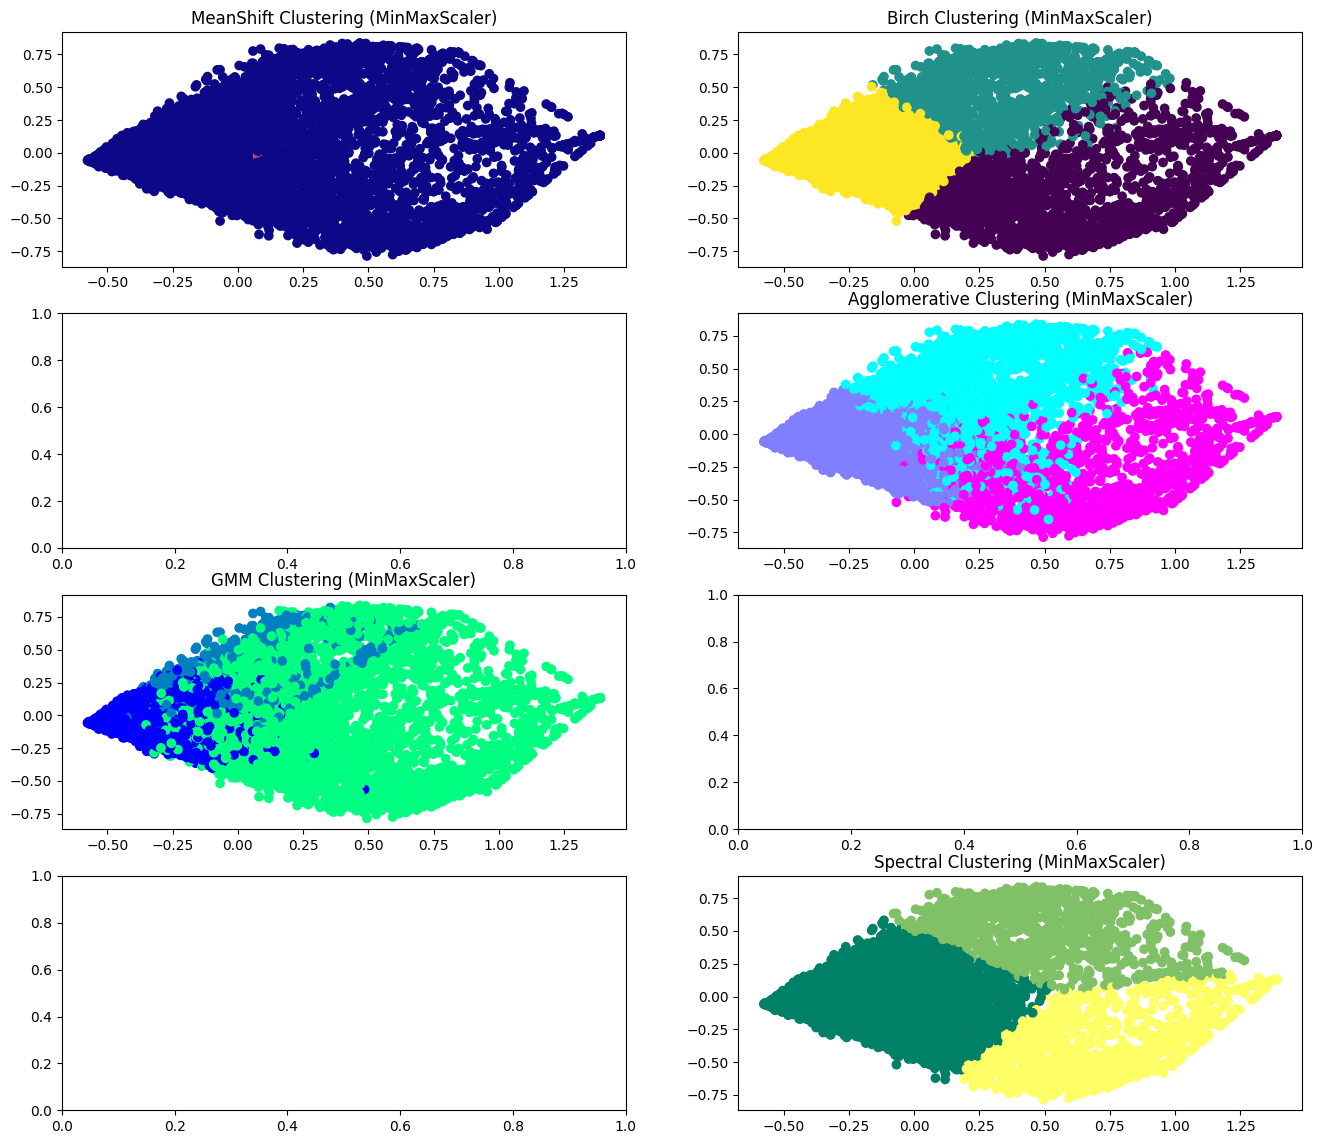

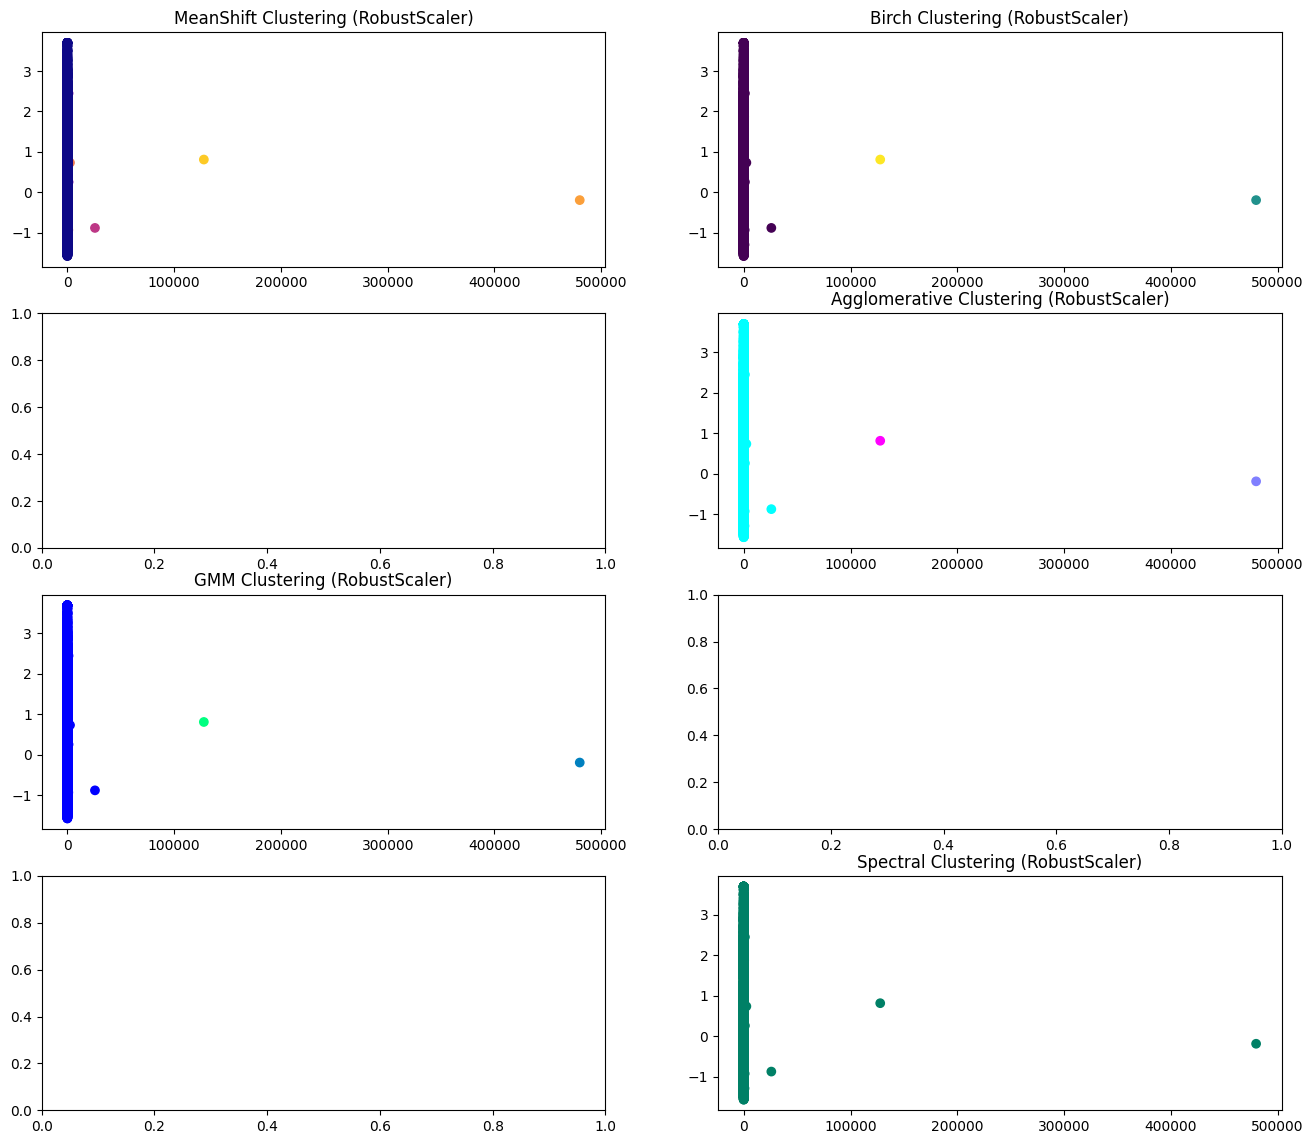

In [ ]:
from sklearn.cluster import MeanShift, Birch, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the scaling methods to be used
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
}


# Select only relevant feaures from dataframe [NEW WITH ONLY RELEVANT FEATURES]
df_selected = df[selected_features]

# Iterate over scalers to test different scaling methods
for scaler_name, scaler in scalers.items():
    # Scale only the numerical data
    scaled_df = scaler.fit_transform(df_selected)

    # Apply PCA to reduce dimensionality for visualization (2D)
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_df)

    # MeanShift clustering
    meanshift = MeanShift()
    meanshift_labels = meanshift.fit_predict(scaled_df)
    silhouette_meanshift = silhouette_score(scaled_df, meanshift_labels) if len(set(meanshift_labels)) > 1 else -1
    print(f'{scaler_name} – MeanShift Silhouette Score: {silhouette_meanshift}')
    print(f'{scaler_name} – MeanShift Cluster Counts:\n{pd.Series(meanshift_labels).value_counts()}\n')

    # Birch clustering
    birch = Birch()  # Set the number of clusters to match your tuning
    birch_labels = birch.fit_predict(scaled_df)
    silhouette_birch = silhouette_score(scaled_df, birch_labels) if len(set(birch_labels)) > 1 else -1
    print(f'{scaler_name} – Birch Silhouette Score: {silhouette_birch}')
    print(f'{scaler_name} – Birch Cluster Counts:\n{pd.Series(birch_labels).value_counts()}\n')

    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=3)  # You can set the number of clusters as desired
    agglomerative_labels = agglomerative.fit_predict(scaled_df)
    silhouette_agglomerative = silhouette_score(scaled_df, agglomerative_labels) if len(set(agglomerative_labels)) > 1 else -1
    print(f'{scaler_name} – Agglomerative Silhouette Score: {silhouette_agglomerative}')
    print(f'{scaler_name} – Agglomerative Cluster Counts:\n{pd.Series(agglomerative_labels).value_counts()}\n')

    # Gaussian Mixture Model
    gmm = GaussianMixture(n_components=3)
    gmm_labels = gmm.fit_predict(scaled_df)
    silhouette_gmm = silhouette_score(scaled_df, gmm_labels) if len(set(gmm_labels)) > 1 else -1
    print(f'{scaler_name} – Gaussian Mixture Silhouette Score: {silhouette_gmm}')
    print(f'{scaler_name} – GMM Cluster Counts:\n{pd.Series(gmm_labels).value_counts()}\n')

    # Spectral Clustering
    spectral = SpectralClustering(n_clusters=3)
    spectral_labels = spectral.fit_predict(scaled_df)
    silhouette_spectral = silhouette_score(scaled_df, spectral_labels) if len(set(spectral_labels)) > 1 else -1
    print(f'{scaler_name} – Spectral Clustering Silhouette Score: {silhouette_spectral}')
    print(f'{scaler_name} – Spectral Clustering Cluster Counts:\n{pd.Series(spectral_labels).value_counts()}\n')

    # Visualize the clusters for each algorithm
    fig, ax = plt.subplots(4, 2, figsize=(16, 14))

    # MeanShift visualization
    ax[0, 0].scatter(pca_data[:, 0], pca_data[:, 1], c=meanshift_labels, cmap='plasma')
    ax[0, 0].set_title(f'MeanShift Clustering ({scaler_name})')

    # Birch visualization
    ax[0, 1].scatter(pca_data[:, 0], pca_data[:, 1], c=birch_labels, cmap='viridis')
    ax[0, 1].set_title(f'Birch Clustering ({scaler_name})')

    # Agglomerative Clustering visualization
    ax[1, 1].scatter(pca_data[:, 0], pca_data[:, 1], c=agglomerative_labels, cmap='cool')
    ax[1, 1].set_title(f'Agglomerative Clustering ({scaler_name})')

    # Gaussian Mixture Model visualization
    ax[2, 0].scatter(pca_data[:, 0], pca_data[:, 1], c=gmm_labels, cmap='winter')
    ax[2, 0].set_title(f'GMM Clustering ({scaler_name})')

    # Spectral Clustering visualization
    ax[3, 1].scatter(pca_data[:, 0], pca_data[:, 1], c=spectral_labels, cmap='summer')
    ax[3, 1].set_title(f'Spectral Clustering ({scaler_name})')

    plt.tight_layout()
    plt.show()


# Clustering Discussion

**1. Mean Shift Clustering**

**Silhouette Scores:**
MeanShift showed moderate Silhouette Scores, such as 0.503 (StandardScaler) and 0.971 (RobustScaler), indicating decent cluster definition in some cases.

**Cluster Distribution:**
MeanShift tended to form one large cluster with several smaller, almost negligible clusters (e.g., one cluster with 8,945 points in StandardScaler). The large, dominant cluster suggests that MeanShift struggled to capture diversity in the dataset, making it less effective for identifying multiple distinct segments.

**Business Implication:** This algorithm may not be suitable for businesses aiming to identify diverse customer segments. MeanShift’s tendency to overemphasize one cluster would limit insights into niche or high-value groups that could drive targeted marketing efforts.

**Conclusion:** MeanShift is useful for detecting large, dominant customer groups but misses out on finer customer segmentation. It is not ideal for this dataset due to the importance of identifying smaller, actionable customer groups for the business.

**2. Birch Clustering**

**Silhouette Scores:** Birch achieved high Silhouette Scores across scalers, with values like 0.9307 (StandardScaler) and 0.4375 (MinMaxScaler), reflecting well-defined clusters with a reasonable level of separation.

**Cluster Distribution:**
Birch produced a well-balanced distribution with three meaningful clusters when using MinMaxScaler (e.g., 5,765, 1,841, and 1,343 points), striking a balance between identifying dominant groups and capturing smaller customer segments.

**Business Implication:**
Birch provides a clear segmentation of core customer groups while also identifying potential outliers. For a business, this segmentation can highlight both primary customer segments and niche, high-impact groups that could require tailored services or special offers.

**Conclusion:**
Birch performed exceptionally well, providing both meaningful segmentation and strong cluster separation. It offers a valuable balance for businesses seeking to understand both dominant market segments and smaller, potentially high-value customer groups.

**3. Agglomerative Clustering**

**Silhouette Scores:**
Agglomerative Clustering had reasonable Silhouette Scores, such as 0.3318 (StandardScaler) and 0.3911 (MinMaxScaler), reflecting moderately well-separated clusters.

**Cluster Distribution:**
The clusters in Agglomerative Clustering were relatively evenly distributed, especially with MinMaxScaler (e.g., 5,459, 1,988, and 1,502 points). This provides a broad segmentation with clear distinctions between groups.

**Business Implication:**
Agglomerative Clustering is useful for businesses that require balanced customer segmentation. The even distribution allows for targeted strategies across multiple customer segments, making it ideal for businesses offering diverse products or services tailored to different customer needs.

**Conclusion:**
The even distribution of clusters makes Agglomerative Clustering ideal for businesses looking for detailed customer analysis across several distinct segments. While the Silhouette Score was moderate, the balanced segmentation provides actionable insights.

**4. Gaussian Mixture Model (GMM)**

**Silhouette Scores:**
GMM produced lower Silhouette Scores, with values like 0.225 (StandardScaler) and 0.168 (MinMaxScaler), indicating that the clusters were less distinct.

**Cluster Distribution:**
Despite lower Silhouette Scores, GMM provided a balanced cluster distribution with MinMaxScaler (e.g., 4,466, 3,686, and 797 points), making it useful for capturing overlapping customer behaviors.

**Business Implication:**
GMM is effective for businesses with customer segments that overlap or where customers exhibit multiple behaviors. It allows for soft clustering, identifying customers who could fit into multiple segments, providing a more nuanced understanding of customer interactions.

**Conclusion:**
While GMM didn’t perform as well in terms of cluster separation, it’s ideal for scenarios where customer groups aren’t mutually exclusive. Businesses that need to capture overlapping behaviors would benefit from this model.

**5. Spectral Clustering**

**Silhouette Scores:**
Spectral Clustering showed mixed performance, with a reasonable Silhouette Score of 0.884 (StandardScaler) but inconsistent results with other scalers (e.g., -0.662 with RobustScaler).

**Cluster Distribution:**
Spectral Clustering produced balanced clusters under certain conditions, such as with MinMaxScaler (e.g., 6,589, 1,193, 1,167 points), but struggled in other cases.

**Business Implication:**
Spectral Clustering can help uncover non-linear relationships in the data, potentially useful for businesses looking to identify hidden customer patterns. However, its inconsistent performance makes it less reliable for this dataset.

**Conclusion:**
Spectral Clustering is suitable for detecting complex, non-linear patterns, but it struggled with the linear nature of this dataset. It could still be useful for businesses needing to detect more subtle customer behaviors or hidden relationships.

# Running the 3 algorithms which performed the best for comparison: Birch, Agglomerative, and GMM

StandardScaler – Birch Silhouette Score: 0.9307006717982643
StandardScaler – Birch Cluster Counts:
0    8947
1       1
2       1
Name: count, dtype: int64

StandardScaler – Agglomerative Silhouette Score: 0.3318247805413136
StandardScaler – Agglomerative Cluster Counts:
0    6071
1    2877
2       1
Name: count, dtype: int64

StandardScaler – Gaussian Mixture Silhouette Score: 0.12482500743021631
StandardScaler – GMM Cluster Counts:
2    6326
1    2481
0     142
Name: count, dtype: int64



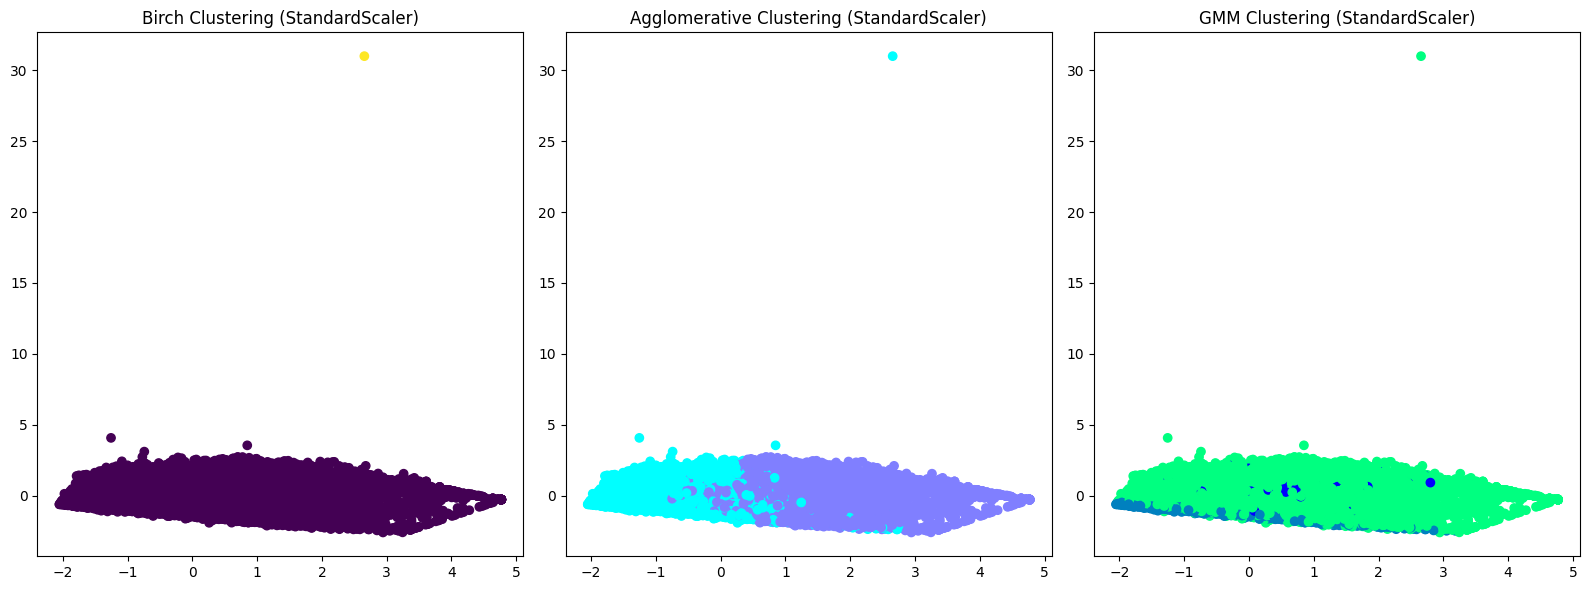

MinMaxScaler – Birch Silhouette Score: 0.43751276262274885
MinMaxScaler – Birch Cluster Counts:
2    5765
0    1841
1    1343
Name: count, dtype: int64

MinMaxScaler – Agglomerative Silhouette Score: 0.3911444135068799
MinMaxScaler – Agglomerative Cluster Counts:
1    5459
0    1988
2    1502
Name: count, dtype: int64

MinMaxScaler – Gaussian Mixture Silhouette Score: 0.16888632892855546
MinMaxScaler – GMM Cluster Counts:
0    4464
1    3690
2     795
Name: count, dtype: int64



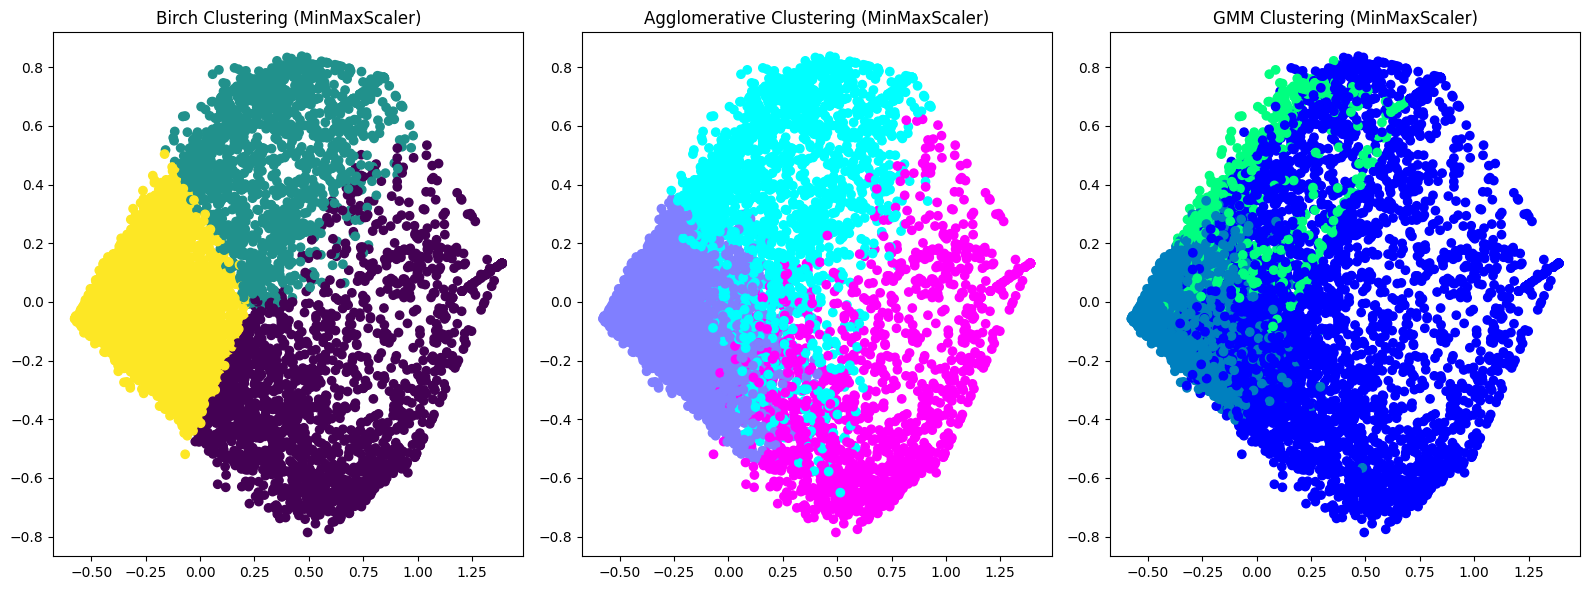

RobustScaler – Birch Silhouette Score: 0.9996681901492636
RobustScaler – Birch Cluster Counts:
0    8947
1       1
2       1
Name: count, dtype: int64

RobustScaler – Agglomerative Silhouette Score: 0.9996681901492636
RobustScaler – Agglomerative Cluster Counts:
0    8947
1       1
2       1
Name: count, dtype: int64

RobustScaler – Gaussian Mixture Silhouette Score: 0.9996681901492636
RobustScaler – GMM Cluster Counts:
0    8947
1       1
2       1
Name: count, dtype: int64



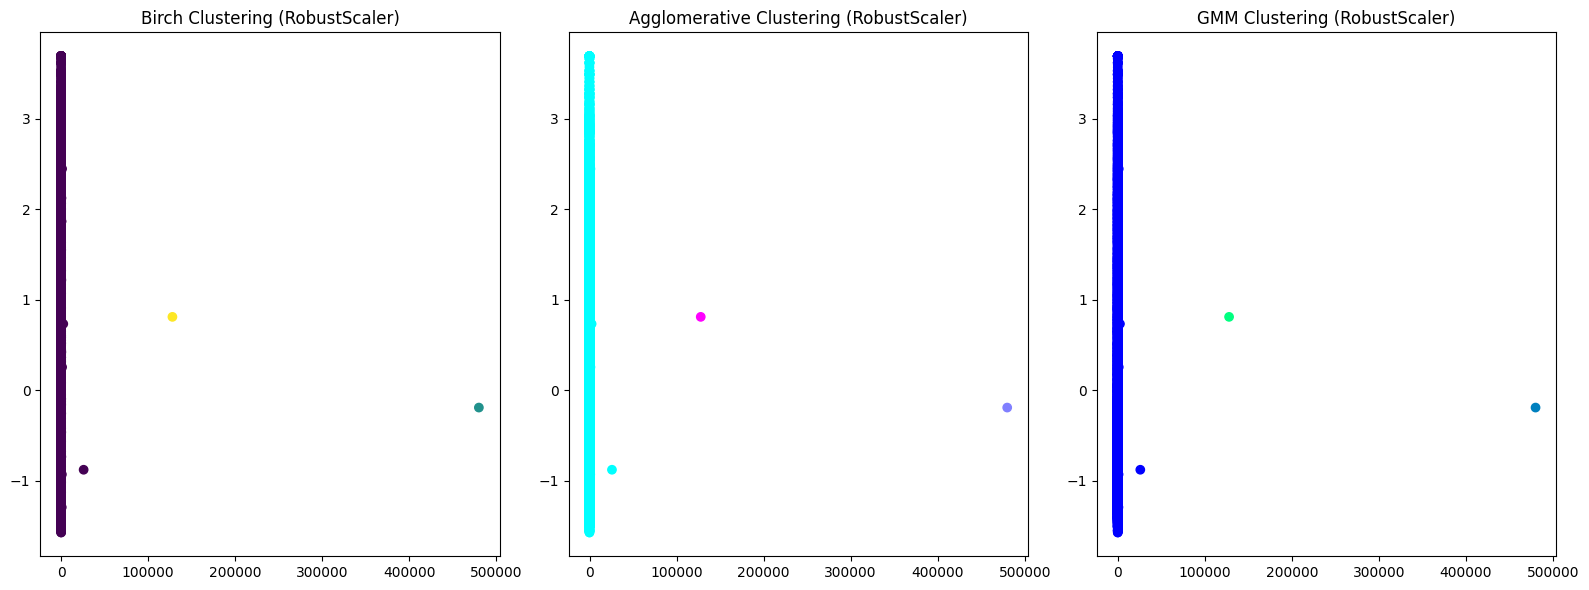

In [ ]:
from sklearn.cluster import MeanShift, Birch, OPTICS, AgglomerativeClustering, DBSCAN, AffinityPropagation, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the scaling methods to be used
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
}

# Iterate over scalers to test different scaling methods
for scaler_name, scaler in scalers.items():
    # Scale only the relevant features data
    scaled_df = scaler.fit_transform(df_selected)

    # Apply PCA to reduce dimensionality for visualization (2D)
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_df)

    # Birch clustering
    birch = Birch()
    birch_labels = birch.fit_predict(scaled_df)
    silhouette_birch = silhouette_score(scaled_df, birch_labels) if len(set(birch_labels)) > 1 else -1
    print(f'{scaler_name} – Birch Silhouette Score: {silhouette_birch}')
    print(f'{scaler_name} – Birch Cluster Counts:\n{pd.Series(birch_labels).value_counts()}\n')

    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=3)
    agglomerative_labels = agglomerative.fit_predict(scaled_df)
    silhouette_agglomerative = silhouette_score(scaled_df, agglomerative_labels) if len(set(agglomerative_labels)) > 1 else -1
    print(f'{scaler_name} – Agglomerative Silhouette Score: {silhouette_agglomerative}')
    print(f'{scaler_name} – Agglomerative Cluster Counts:\n{pd.Series(agglomerative_labels).value_counts()}\n')

    # Gaussian Mixture Model
    gmm = GaussianMixture(n_components=3)
    gmm_labels = gmm.fit_predict(scaled_df)
    silhouette_gmm = silhouette_score(scaled_df, gmm_labels) if len(set(gmm_labels)) > 1 else -1
    print(f'{scaler_name} – Gaussian Mixture Silhouette Score: {silhouette_gmm}')
    print(f'{scaler_name} – GMM Cluster Counts:\n{pd.Series(gmm_labels).value_counts()}\n')

    # Visualize the clusters for each algorithm
    fig, ax = plt.subplots(1, 3, figsize=(16, 6))  # 1 row, 3 columns for the 3 visualizations

    # Birch visualization
    ax[0].scatter(pca_data[:, 0], pca_data[:, 1], c=birch_labels, cmap='viridis')
    ax[0].set_title(f'Birch Clustering ({scaler_name})')

    # Agglomerative Clustering visualization
    ax[1].scatter(pca_data[:, 0], pca_data[:, 1], c=agglomerative_labels, cmap='cool')
    ax[1].set_title(f'Agglomerative Clustering ({scaler_name})')

    # Gaussian Mixture Model visualization
    ax[2].scatter(pca_data[:, 0], pca_data[:, 1], c=gmm_labels, cmap='winter')
    ax[2].set_title(f'GMM Clustering ({scaler_name})')

    plt.tight_layout()
    plt.show()


# Comparison Discussion

**1. Silhouette Score**

**Birch:**
MinMaxScaler: 0.4375,
StandardScaler: 0.9307

**Agglomerative:**
MinMaxScaler: 0.3911 (lower than Birch),
StandardScaler: 0.3318 (significantly lower than Birch)

**GMM:**
MinMaxScaler: 0.1688 (lowest among all),
StandardScaler: 0.1248 (lowest in comparison)

**Conclusion:** Birch consistently had the highest Silhouette Score, indicating better-defined and well-separated clusters compared to Agglomerative and GMM, which showed weaker cluster separation.

**2. Cluster Distribution**

**Birch:**
MinMaxScaler: (5,765, 1,841, 1,343)
StandardScaler: Dominant large cluster (8,947 points) with small outliers.

**Agglomerative:**
MinMaxScaler: (5,459, 1,988, 1,502)
StandardScaler: More balanced distribution (6,071, 2,877, 1).

**GMM:**
MinMaxScaler: (4,464, 3,690, 795)
StandardScaler: Dominant large cluster (6,326 points), smaller but more balanced minor clusters (2,481, 142).

**Conclusion:** Birch provided a more balanced distribution under MinMaxScaler compared to Agglomerative and GMM, but Agglomerative offered the most balanced distribution overall. GMM showed uneven distribution, with a more dominant large cluster and smaller, less significant clusters.

**3. Business Implications**

**Birch:**
Suitable for businesses aiming to focus on a dominant core segment while still capturing smaller, niche groups. The well-separated clusters are useful for both broad and targeted marketing strategies.

**Agglomerative:**
Balanced distribution makes it ideal for businesses that require detailed segmentation across different customer groups for targeted marketing, as it identifies multiple evenly sized customer segments.

**GMM:**
Best suited for situations where customer segments overlap, allowing businesses to identify fuzzy boundaries between customer groups. However, the less distinct clusters may lead to less clear business insights.

**Conclusion:** Birch provides the best compromise for businesses looking for dominant segment identification with some attention to niche markets. Agglomerative is better for balanced segmentation, while GMM is ideal for scenarios with overlapping customer behavior but offers less distinct segmentation.



# Final Model Selection: Birch with MinMaxScaler

**Balanced Silhouette Score and Cluster Distribution:** Birch with MinMax scaling provided a good balance between Silhouette Score (0.4375) and cluster distribution, producing three well-defined clusters (5,765, 1,841, and 1,343 points). This balance is crucial for businesses that need to understand their core customer segments while also identifying niche groups.

**Business Implication:** The clusters identified by Birch offer actionable insights for the business. The largest cluster likely represents the majority of the customer base, while the smaller clusters could indicate high-value or specialized customers. This segmentation allows businesses to tailor marketing strategies effectively—focusing on mass-market approaches for the largest segment while offering personalized services or promotions to smaller, high-impact groups.

**Conclusion:** Birch was selected as the best algorithm due to its ability to provide meaningful and balanced segmentation, which is essential for businesses aiming to target diverse customer groups effectively.

# Final Model

Selecting Birch with MinMaxScaler as final model

In [ ]:
# Scaling the data using MinMaxScaler
final_scaler = MinMaxScaler()
final_scaled = final_scaler.fit_transform(df_selected)

Hypertune Birch Model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Function to evaluare model
def evaluate_clustering_model_silhouette(df_selected, labels):
    return silhouette_score(df_selected, labels)

# Define parameter grid for Birch tuning
param_grid = {
    'threshold': [0.01, 0.05, 0.1, 0.2],
    'branching_factor': [20, 30, 40, 50],
}

# Initialize Birch model
birch_model = Birch()

# Set up GridSearchCV with Silhouette score as the evaluation metric
grid_search = GridSearchCV(estimator=birch_model, param_grid=param_grid, cv=3, scoring=silhouette_score, verbose=1)

# Fit the model on the scaled data
grid_search.fit(final_scaled)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Birch Parameters (using Silhouette Score): {best_params}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 203, in wrapper
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'X' parameter of silhouette_score must be an array-like or a sparse matrix. Got Birch(branching_factor=20, threshold=0.01) instead.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: Us

Best Birch Parameters (using Silhouette Score): {'branching_factor': 20, 'threshold': 0.01}


In [ ]:
# Apply the best parameters to the Birch model
best_birch = Birch(threshold=best_params['threshold'], branching_factor=best_params['branching_factor'])
best_birch_labels = best_birch.fit_predict(final_scaled)

In [ ]:
# Calculate the tuned Birch model's silhouette score
birch_silhouette = evaluate_clustering_model_silhouette(final_scaled, best_birch_labels)
print(f"Best Birch Model - Silhouette Score: {birch_silhouette}")

Best Birch Model - Silhouette Score: 0.33300999196487147


We attempted to tune Birch model, but the original model outperformed. Therefore, we went with the original model as our final model.

**Final Model**

In [ ]:
# Birch clustering model
birch = Birch()
birch_labels = birch.fit_predict(final_scaled)

In [ ]:
# Evaluate Birch model with Cluster Counts and Silhouette Score
silhouette_birch = silhouette_score(final_scaled, birch_labels) if len(set(birch_labels)) > 1 else -1
print(f'MinMaxScaler – Birch Silhouette Score: {silhouette_birch}')
print(f'MinMaxScaler – Birch Cluster Counts:\n{pd.Series(birch_labels).value_counts()}\n')

MinMaxScaler – Birch Silhouette Score: 0.43751276262274885
MinMaxScaler – Birch Cluster Counts:
2    5765
0    1841
1    1343
Name: count, dtype: int64



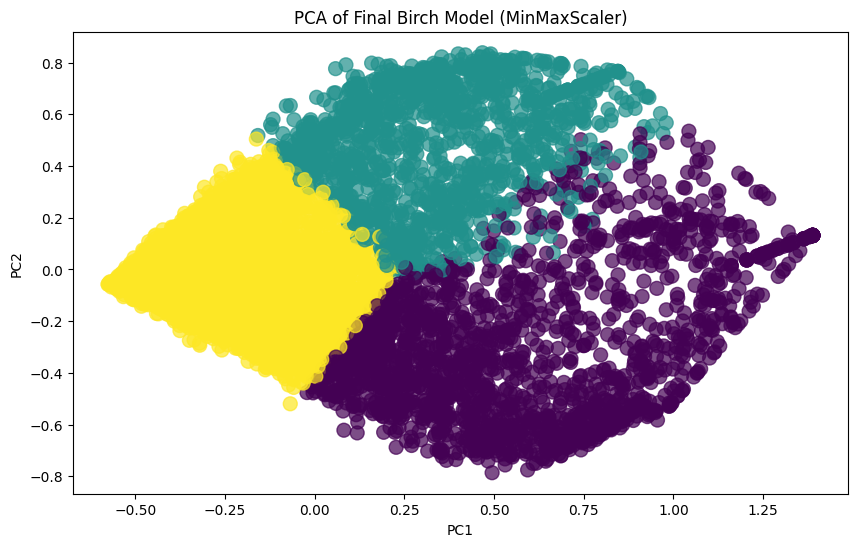

In [ ]:
# PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(final_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=birch_labels, cmap='viridis', s=100, alpha=0.7)
plt.title('PCA of Final Birch Model (MinMaxScaler)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Cluster Profiles

In [ ]:
# Create a copy of the original data and assign cluster labels
og_df = df.copy()
og_df['Cluster'] = birch_labels

In [ ]:
og_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40             0.000   
C10002   3202.467416           0.909091       0.00             0.000   
C10003   2495.148862           1.000000     773.17           773.170   
C10004   1666.670542           0.636364    1499.00          1444.575   
C10005    817.714335           1.000000      16.00            16.000   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                     95.4      0.000000             0.166667   
C10002                      0.0   2784.671635             0.000000   
C10003                      0.0      0.000000             1.000000   
C10004                      0.0    205.788017             0.083333   
C10005                      0.0      0.000000             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
C10001         1000.0   201.802084        139.509787          0.000000   
C10002         7000.0  4103.032597       1072.340217          0.222222   
C10003         7500.0   622.066742        627.284787          0.000000   
C10004         7500.0     0.000000        312.452292          0.000000   
C10005         1200.0   678.334763        244.791237          0.000000   

         TENURE  BALANCE_TO_CREDIT_RATIO  PAYMENTS_TO_PURCHASES_RATIO  Cluster  
CUST_ID                                                                         
C10001       12                 0.040901                     2.115326        2  
C10002       12                 0.457495                     1.623075        1  
C10003       12                 0.332687                     0.804567        2  
C10004       12                 0.222223                     0.000000        2  
C10005       12                 0.681429                    42.395923        2

In [ ]:
# Create Cluster Profiles (count, mean, median)
cluster_summary = og_df.groupby('Cluster').agg([ 'count','mean', 'median'])
pd.set_option('display.max_columns', None)
print(cluster_summary)

        BALANCE                           BALANCE_FREQUENCY                   \
          count         mean       median             count      mean median   
Cluster                                                                        
0          1841  1722.715135  1019.133646              1841  0.944159    1.0   
1          1343  3831.249078  4099.755913              1343  0.971188    1.0   
2          5765   716.126265   437.609832              5765  0.834155    1.0   

        PURCHASES                       ONEOFF_PURCHASES               \
            count         mean   median            count         mean   
Cluster                                                                 
0            1841  2222.970440  2490.07             1841  1067.303580   
1            1343   296.340827    66.00             1343   174.009077   
2            5765   365.462794   232.80             5765   168.947368   

                  INSTALLMENTS_PURCHASES                      CASH_ADVANCE  \
  

# **4. Interpreting Clusters**

Note: Due to formatting issues, we were unable to use the $ sign; therefore assume all monetary values are in dollars.

#Cluster 0: Engaged Spenders

We have coined this cluster Engaged spenders, due to the various characteristics that they all share. Cluster 0 stands out for its high, consistent spending and strong repayment habits. These are financially stable customers who frequently use with their credit cards.

**Customer Profile:**
* **High Balance & High Spending:** Customers in this cluster have a moderately high average balance 1723 and demonstrate high spending across various categories such as purchases. In fact this clusters average purchases 2,223, significantly higher than Clusters 1 and 2, which are 296 and 364 respectively

* **Frequent Credit Card Usage:**  They exhibit high purchase frequency (0.841), which indicates consistent use of the credit card for everyday transactions. This group also shows significant one-off purchases and installment purchases, with high median values, suggesting they use their card for both large and small transactions.

* **Cash Advance Users:** They utilize cash advances with an average value of 1,297, which, while high, isn’t the primary spending area for this group. This implies that they occasionally use credit for immediate likely for immediate cash needs but maintain control over their finances.

* **High Credit Limit:** With an average credit limit of 6,750, they have access to substantial credit, suggesting they are viewed by the bank as low-risk customers who can responsibly handle higher limits.

* **Good Payment Behavior:** Payments in this cluster are high, averaging 2,749, with a high minimum payment of around 2,658. This, paired with their strong balance-to-credit ratio (0.286), indicates those in this cluster are financially responsible.

We found that the Key Distinguishing features were that

* **Moderately High Balance and High Spending Behavior:**

  * **Evidence:** The average balance for Cluster 0 is 1,723, which is higher than Cluster 2 (716) but lower than Cluster 1 (3,831). This suggests that Cluster 0 maintains a stable balance but doesn’t carry excessively high amounts of debt.
  * **Spending Evidence:** Cluster 0 has an average purchase amount of 2,223, with a median of 2,490. This is significantly higher than Cluster 1 (296) and Cluster 2 (365), indicating that customers in this group frequently use their cards for substantial purchases.

* **High Purchase Frequency:**
  * **Evidence::** The purchase frequency for Cluster 0 is 0.841, with a median of 1.0. This is the highest among all clusters, showing that customers in Cluster 0 are regular card users. In comparison, Cluster 1 has a purchase frequency of only 0.275, and Cluster 2 has a lower frequency of 0.428.

* **Significant One-Off and Installment Purchases:**
  *  **One-Off Purchases Evidence:** Cluster 0 has an average one-off purchase amount of 1,067, much higher than Cluster 1 (174) and Cluster 2 (168). This suggests that these customers often use their cards for one-time, potentially large transactions.
  * **Installment Purchases Evidence:** With an average installment purchase amount of 1,297, Cluster 0 has installment-based transactions compared to Cluster 1 (121) and Cluster 2 (195). This indicates that Cluster 0 users may prefer using their credit card for structured payments, perhaps for planned or big-ticket items.
  
* **Higher Payments and Balanced Payment-to-Purchase Ratio:**
  
  * **Payments Evidence:** Cluster 0 makes high average payments of 2,749 with a median of 2,658, showing a strong repayment capacity. This is more higher than Cluster 2, whose average payment is only 707.
  * **Payment-to-Purchase Ratio Evidence:** The ratio for Cluster 0 is 1.47, which suggests that their payments are balanced with their purchases, reinforcing that they are responsible card users.

#Cluster 1: High Balance Managers
We have coined this cluster High Balance Managers, due to the various characteristics that they all share. Cluster 1 is characterized by high balances, limited purchase activity, and a notable reliance on cash advances.

**Customer Profile:**
* **Very High Balances with Low Spending Activity:** Cluster 1 has the highest average balance at 3,831, yet their total purchases are quite low (mean of 296). This discrepancy suggests they hold high balances, possibly accruing interest, without actively using their credit card for transactions.

* **Minimal One-Off and Installment Purchases:** With an average one-off purchase amount of 174 and negligible installment purchases, they are infrequent users of their credit cards for transactions.

* **Heavy Cash Advance Usage:** This cluster has the highest frequency and amount of cash advances (mean of 9.10 per transaction), suggesting they may rely on credit for short-term liquidity or emergency needs. This pattern may indicate a preference for cash over credit-based transactions.

* **Higher Credit Limits and Minimum Payments:** With an average credit limit of 7,481 (the highest among clusters), these customers are likely considered creditworthy but may be managing debt. Their minimum payments are also high, which might indicate a reliance on minimum payments rather than full repayments.

* **Moderate Payment-to-Purchase Ratio:** A very high payments-to-purchases ratio (389.08) suggests they make substantial payments but do not actively use their cards for new purchases, likely focusing on debt repayment.

Key distinguishing features:
* **Very High Balance and Limited Spending:**
  * **Evidence:** Cluster 1 has the highest average balance at 3,831, with a median balance of 4,100. This is notably higher than Cluster 0 (1,723) and Cluster 2 (716). However, their purchase amount is significantly lower, with an average of 296 and a median of only 66. This contrast suggests that customers in Cluster 1 tend to accumulate a high balance without frequent new spending.
* **High Credit Limit but Low Purchase Frequency:**
  * **Credit Limit Evidence:** With an average credit limit of 7,481, Cluster 1 holds the highest available credit, likely reflecting the bank’s trust in their creditworthiness. However, their purchase frequency is the lowest among the clusters, at 0.275, indicating they aren’t actively using their credit for everyday transactions.
  * **Comparison Evidence:** For example, Cluster 0, the most active spender, has a purchase frequency of 0.841, showing a clear behavioral difference in spending habits.


#Cluster 2: Low Engagement Users
We have coined this cluster Low Engagement Users, due to the various characteristics that they all share. Cluster 2 is defined by low engagement with credit card products, low balances, and limited spending.


**Customer Profile:**
* **Low Balance & Minimal Spending:** Cluster 2 customers maintain the lowest average balance (716) and have a low average purchase amount (365), indicating minimal engagement with their credit cards.
* **Infrequent Use of Credit Card Features:** They show low purchase frequency (0.428), minimal one-off purchases (168), and almost no installment purchases. This suggests that they rarely use their credit card, potentially for occasional or emergency expenses only.
* 	**Limited Credit Limit and Payment Activity:** With the lowest credit limit (2,961) and minimal payment activity, they may be newer customers or have lower income/credit scores.
* **Small Payments and Low Payment-to-Purchase Ratio:** Their payments are the lowest among clusters, with an average of 707, and they do not make high-value purchases, as indicated by the low payments-to-purchases ratio (6.77).

Key distinguishing features:
* **Lowest Balance and Credit Limit:**
   * **Credit Limit Evidence:** Cluster 2 has the lowest average credit limit at 2,961, indicating that they either have lower incomes, shorter credit histories, or are considered higher-risk customers by the bank.
* **Minimal Spending and Low Purchase Frequency**
 * **Purchases Evidence:** Cluster 2’s average purchase amount is 365, and its median is 233, both notably lower than Cluster 0’s 2,223. The purchase frequency is also lower at 0.428, showing infrequent credit card use.

 * **Comparison with Cluster 0 and 1:** The stark contrast between the purchase behavior of Cluster 2 and that of the other clusters highlights Cluster 2’s lack of engagement. For example, Cluster 0’s purchase frequency of 0.841 indicates regular usage, whereas Cluster 2’s is nearly half of that.

* **Lowest Payment Amounts and Payment Frequency:**
 * **Payment Evidence:** The average payment in Cluster 2 is 707, with a median of 507, both significantly lower than Cluster 0 (2,749). This could indicate a limited ability or willingness to engage with larger credit transactions or to carry high balances.
 * **Minimal Payment-to-Purchase Ratio:** Cluster 2 has a payment-to-purchase ratio of 6.78, which is skewed due to low overall spending and payments, suggesting low reliance on credit for everyday expenses.
* **Almost No Use of Cash Advances or Installments:**
  * **Cash Advance and Installments Evidence:** Both cash advance and installment purchase frequencies are extremely low for Cluster 2, with minimal average values in these categories. This suggests that they either do not need, or do not have access to, the liquidity that cash advances provide.

# **5. Actionable Insights**

#Cluster 0: Engaged Spenders
**Significance for Marketing:**

* **Enhanced Rewards Programs:** Cluster 0 customers are frequent credit card users with high spending patterns. Offering premium rewards, such as cashback, travel points, and exclusive access to events or experiences, can enhance loyalty and encourage even higher usage.
* **Tiered Loyalty Programs:** Create a tiered rewards system that increases benefits with spending. This could include milestone-based rewards (e.g., bonus points for spending over a certain amount) and access to exclusive offers, making the customer feel recognized for their loyalty.
* **Premium Credit Card Offers:** Promote premium or elite credit cards with additional benefits, such as no foreign transaction fees, higher credit limits, and priority customer service. Engaged Spenders are likely willing to pay for added perks and exclusive services, especially if they enhance the overall credit card experience.

**Business Recommendations:**

1. **Launch a "VIP Rewards" Program:** Design a loyalty program that gives extra benefits to high-spending customers, such as accelerated points or access to exclusive experiences, to reinforce their brand connection.
2. **Create Targeted Spending Campaigns:** Offer time-limited promotions in popular spending categories for this segment, like travel or dining, to drive further engagement.
3. **Cross-Sell High-End Financial Products:** Given their financial stability, consider cross-selling other products like investment accounts, savings options with higher returns, or loans with favorable terms, which could enhance the relationship with the bank.

**Targeting Strategy:**
* **Personalized Communications:** Use customer data to tailor emails and app notifications that highlight rewards progress, exclusive offers, or targeted promotions in categories they use frequently.
* **App and Online Experience Optimization:** Provide an enhanced digital experience for this group, such as personalized dashboards showing rewards balances and tailored financial insights, to encourage continued engagement.

#Cluster 1: High Balance Managers
**Significance for Marketing:**

* **Debt Management Programs:**  These customers carry high balances and may need assistance managing their debt. Targeting them with balance transfer options at low introductory rates or debt consolidation loans could help them reduce interest costs and improve their financial outlook.
* **Credit Counseling and Financial Planning Services:**  Cluster 1 customers may benefit from financial health resources, such as credit counseling sessions, budgeting tools, and access to financial advisors. Offering free or discounted financial planning services could foster loyalty and help these customers regain financial stability.
* **Encouragement of Small Purchases:**  Since they don’t frequently use their cards for everyday spending, a campaign that rewards small, manageable purchases could incentivize more frequent usage while helping them build positive credit habits.

**Business Recommendations:**

1. **Offer a "Debt Reduction" Package:**  Design a package that includes balance transfers with a low APR, credit line management tools, and payment reminders. This could help reduce their financial burden and strengthen their relationship with the bank.
2. **Promote a "Financial Wellness Program":**  Launch a program that includes credit score insights, personal financial health reports, and tips on debt management to support their financial recovery.
3. **Implement Payment Flexibility Options:**  Allow for tailored payment options, such as installment plans, where they can break down larger balances into manageable payments. This approach can reduce their debt load while enhancing engagement with the bank.

**Targeting Strategy:**

* **Educational Outreach:** Send targeted educational content on budgeting, debt management, and responsible credit usage through emails and app notifications.
* **Low-Interest Promotions for Cash Advances:**  Since they rely on cash advances, offer promotional rates on cash advances for a limited period or bundle it with payment plan options to encourage controlled and manageable borrowing.

#Cluster 2: Low Engagement Users
**Significance for Marketing:**

* **Introductory Rewards to Increase Engagement:**  Low Engagement Users are less active with their credit cards and may need incentives to increase usage. Offering cashback on initial purchases or bonus points for first-time transactions could encourage engagement.
* **Education on Building Credit and Earning Rewards:**  Since this group may not fully understand the benefits of regular credit card usage, campaigns focused on educating them about building credit, earning rewards, and using credit responsibly could help.
* **Credit Limit Building Opportunities:**  To encourage loyalty, gradually increasing credit limits for responsible users in this group can improve their financial flexibility and demonstrate the bank’s trust in them.

**Business Recommendations:**

1. **Launch an "Introductory Rewards Campaign":** Offer new or enhanced rewards for a set period on everyday spending categories like groceries and utilities to stimulate regular usage.
2. **Develop a "Credit Building Assistance" Program:**  Provide personalized insights on building credit scores, responsible card usage, and managing small balances to appeal to newer or low-risk customers.
3. **Consider Offering Co-Branded or Basic Card Options:**  This segment may be more interested in co-branded or simple cash-back cards with minimal fees or requirements, helping them see the value without feeling pressured to spend heavily.

**Targeting Strategy:**

* **Educational Content Delivery:**  Use the app, emails, and social media to deliver educational content that highlights the benefits of responsible card usage and how it can contribute to credit building and financial flexibility.
* **Customer Service Outreach:** Provide proactive outreach via customer service or financial advisors to discuss the benefits of credit usage, answer any questions, and offer personalized financial guidance.